#### Import library

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
import seaborn as sns
import matplotlib.dates as mdates

#### Import dataset

In [2]:
df = pd.read_csv('stock_price.csv')

df.head()

,Date,Open,High,Low,Close,Volume,AdjustedClose
0,20190102,840.0,850.0,835.0,845.0,694300,422.5
1,20190103,845.0,860.0,835.0,860.0,1394700,430.0
2,20190104,850.0,860.0,845.0,855.0,271000,427.5
3,20190107,855.0,865.0,855.0,855.0,1082900,427.5
4,20190108,855.0,860.0,845.0,850.0,296200,425.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1243 non-null   int64  
 1   Open           1243 non-null   float64
 2   High           1243 non-null   float64
 3   Low            1243 non-null   float64
 4   Close          1243 non-null   float64
 5   Volume         1243 non-null   int64  
 6   AdjustedClose  1243 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 68.1 KB


#### Cek duplikasi data

In [4]:
df.duplicated().sum()

0

#### Merubah tipe data tanggal

In [5]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y%m%d')

df['Date']

0      2019-01-02
1      2019-01-03
2      2019-01-04
3      2019-01-07
4      2019-01-08
          ...    
1238   2024-01-29
1239   2024-01-30
1240   2024-01-31
1241   2024-02-01
1242   2024-02-02
Name: Date, Length: 1243, dtype: datetime64[ns]

#### Cek data null

In [6]:
df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
AdjustedClose    0
dtype: int64

#### Cek jumlah baris dan kolom

In [7]:
df.shape

(1243, 7)

#### Cek statistik dataset

In [8]:
df.describe()

,Open,High,Low,Close,Volume,AdjustedClose
count,1243.000000,1243.000000,1243.000000,1243.000000,1.243000e+03,1243.000000
mean,898.423974,910.615447,884.884151,897.168946,1.724480e+07,707.315768
std,216.066332,221.059697,211.544872,216.627816,2.454029e+07,147.808700
min,486.000000,494.000000,478.000000,486.000000,1.845000e+05,375.000000
25%,765.000000,770.000000,750.000000,760.000000,4.533050e+06,600.000000
50%,830.000000,845.000000,820.000000,830.000000,1.033230e+07,730.000000
75%,1010.000000,1020.000000,995.000000,1010.000000,2.111840e+07,795.000000
max,1480.000000,1535.000000,1420.000000,1495.000000,3.753657e+08,1050.000000


#### Splitting dataset

In [9]:
X = df.iloc[:,1:4]
Y = df.iloc[:,4:5]

print('Data X/Independen\n',X)
print('Data Y/Dependen\n',Y)

Data X/Independen
        Open   High    Low
0     840.0  850.0  835.0
1     845.0  860.0  835.0
2     850.0  860.0  845.0
3     855.0  865.0  855.0
4     855.0  860.0  845.0
...     ...    ...    ...
1238  500.0  510.0  498.0
1239  505.0  510.0  500.0
1240  505.0  510.0  505.0
1241  510.0  510.0  500.0
1242  505.0  505.0  500.0

[1243 rows x 3 columns]
Data Y/Dependen
       Close
0     845.0
1     860.0
2     855.0
3     855.0
4     850.0
...     ...
1238  505.0
1239  505.0
1240  510.0
1241  505.0
1242  500.0

[1243 rows x 1 columns]


In [10]:
df_date = pd.to_datetime(df['Date'])

df_date

0      2019-01-02
1      2019-01-03
2      2019-01-04
3      2019-01-07
4      2019-01-08
          ...    
1238   2024-01-29
1239   2024-01-30
1240   2024-01-31
1241   2024-02-01
1242   2024-02-02
Name: Date, Length: 1243, dtype: datetime64[ns]

#### Grafik pergerakan harga penutupan saham

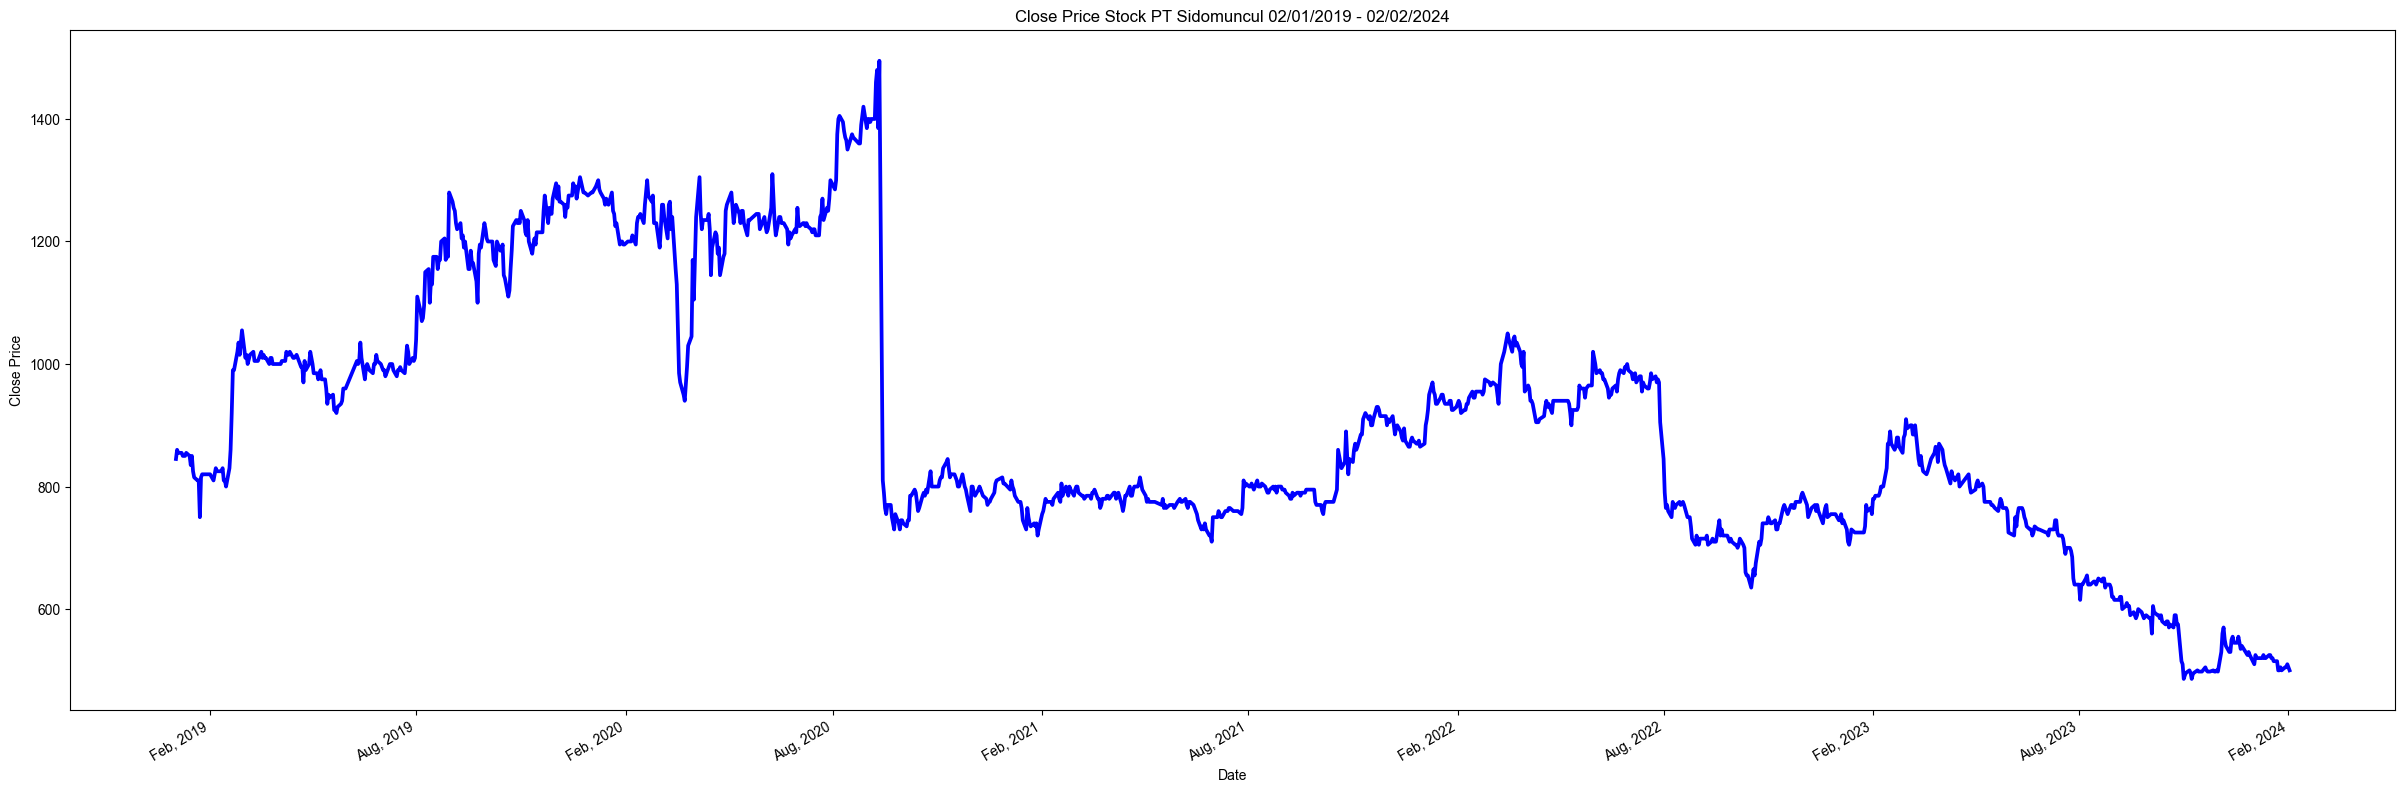

In [11]:
half_year_locator = mdates.MonthLocator(interval=6)
year_month_formatter = mdates.DateFormatter("%Y-%m")
month_year_formatter = mdates.DateFormatter('%b, %Y')

fig,ax = plt.subplots(figsize=(30,10))
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)
ax.xaxis.set_major_formatter(month_year_formatter)

fig.autofmt_xdate()

sns.lineplot(x=df_date,y=df['Close'],data=df,linestyle='solid',color='blue',linewidth=2.7).set(title='Close Price Stock PT Sidomuncul 02/01/2019 - 02/02/2024',xlabel='Date',ylabel='Close Price')
sns.set_theme(style='white',font_scale=1.2)

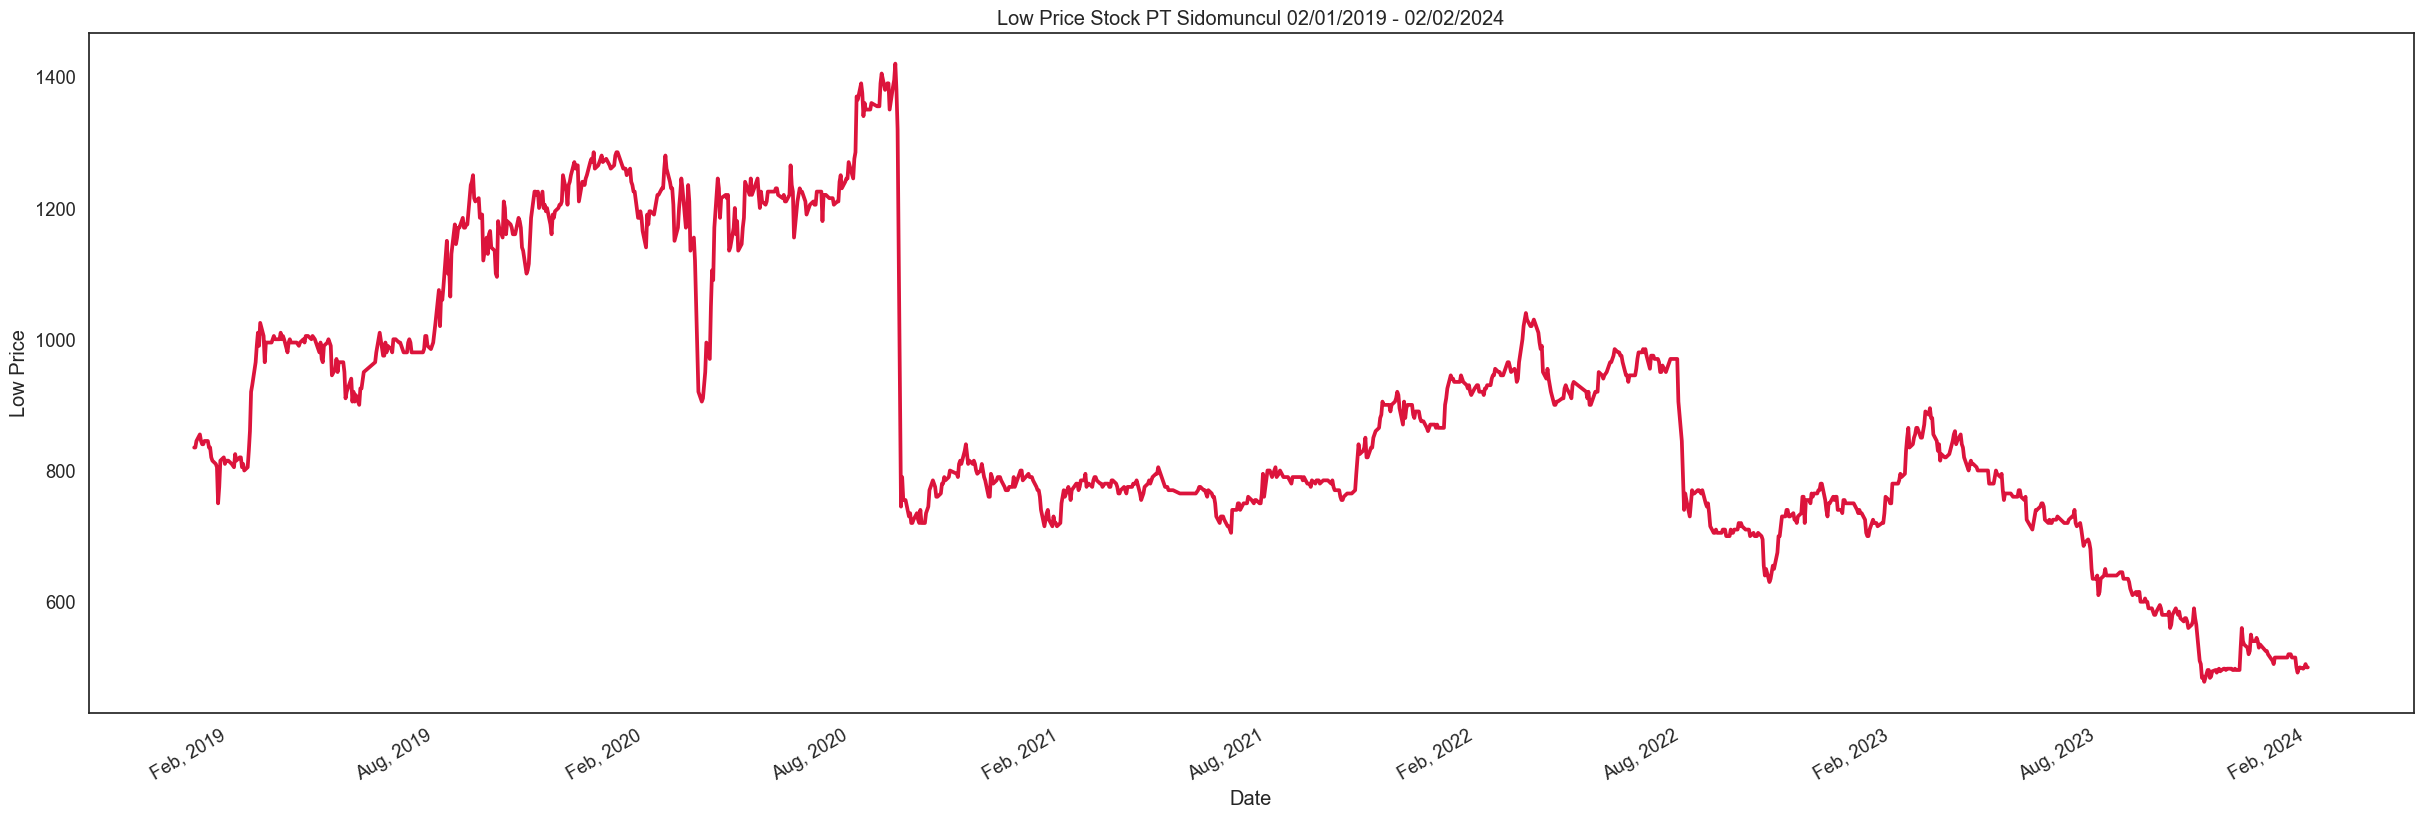

In [12]:
half_year_locator = mdates.MonthLocator(interval=6)
year_month_formatter = mdates.DateFormatter("%Y-%m")
month_year_formatter = mdates.DateFormatter('%b, %Y')

fig,ax = plt.subplots(figsize=(30,10))
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)
ax.xaxis.set_major_formatter(month_year_formatter)

fig.autofmt_xdate()

sns.lineplot(x=df_date,y=df['Low'],data=df,linestyle='solid',color='crimson',linewidth=2.7).set(title='Low Price Stock PT Sidomuncul 02/01/2019 - 02/02/2024',xlabel='Date',ylabel='Low Price')
sns.set_theme(style='white',font_scale=2.8)

#### Diagram korelasi harga pembukaan dan harga penutupan

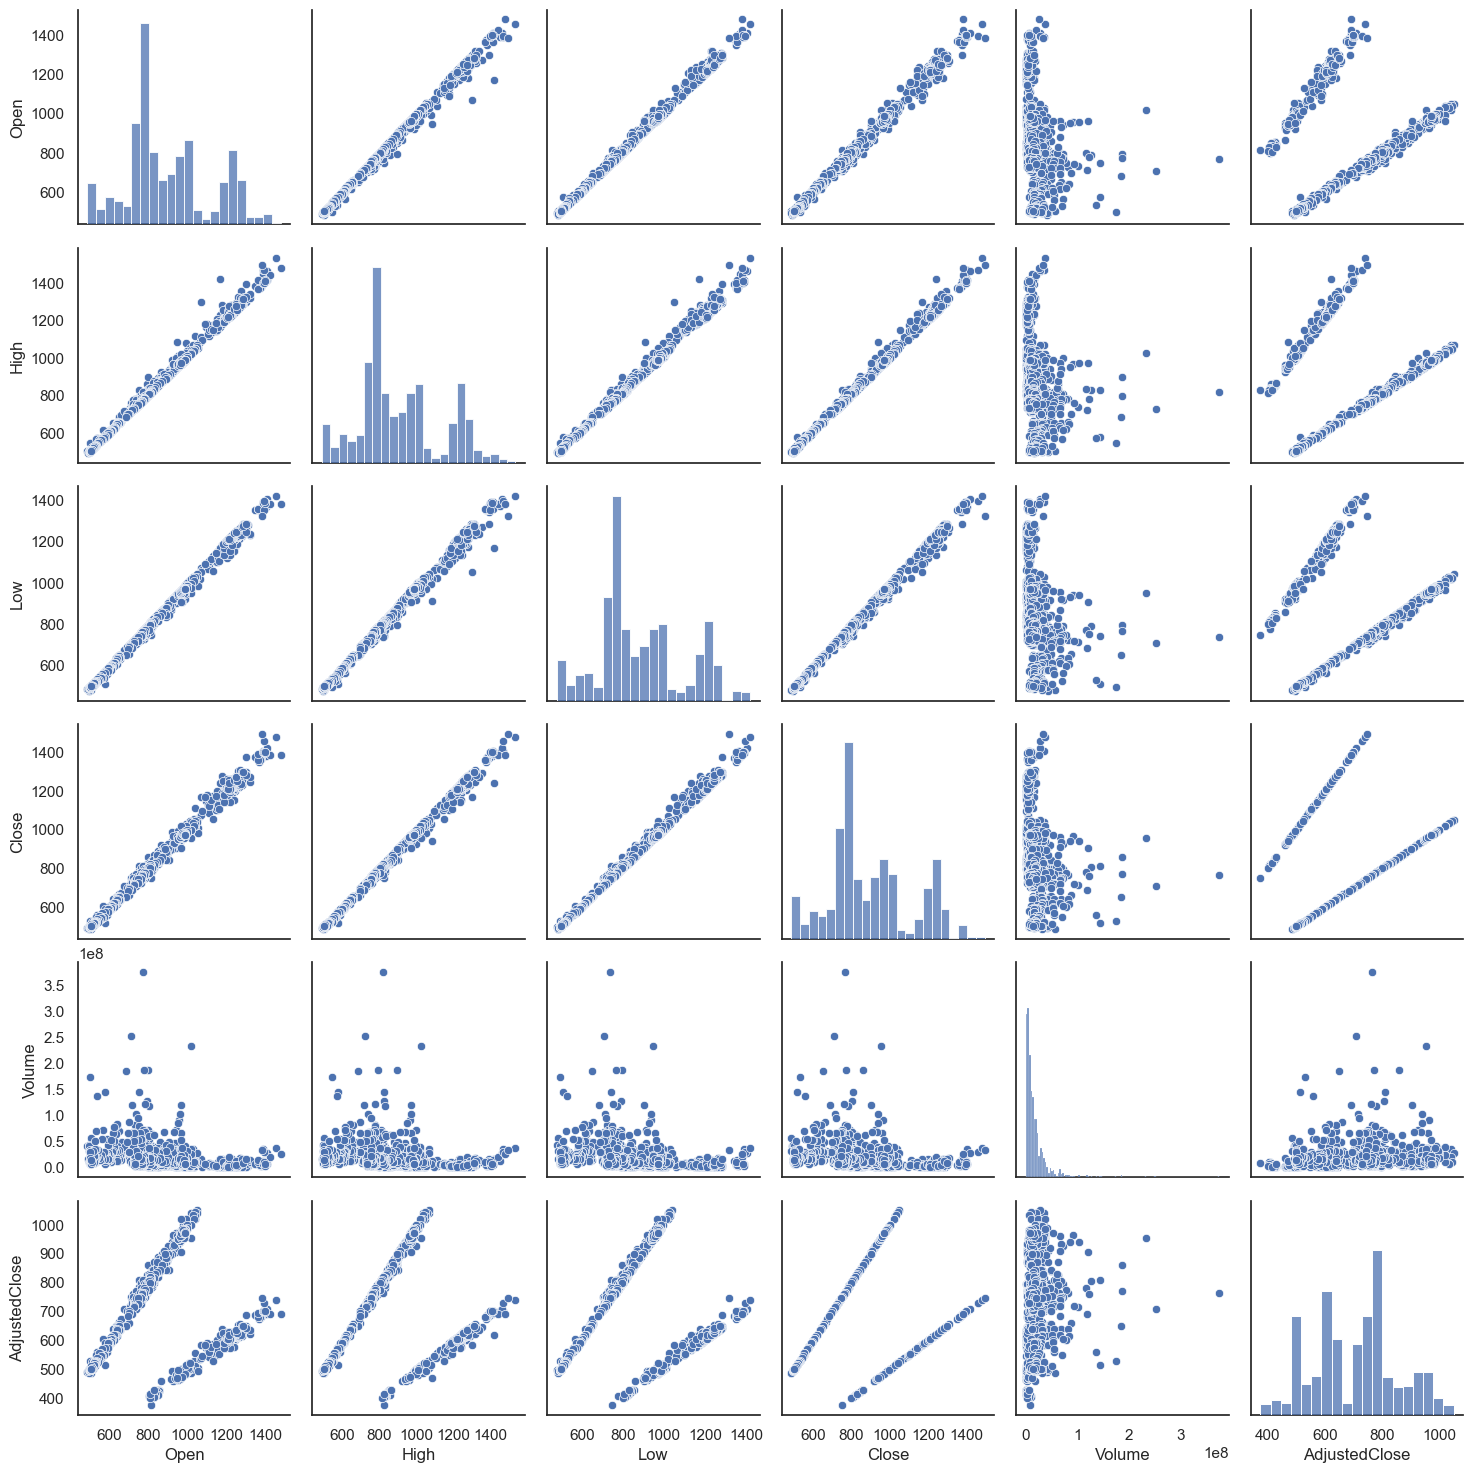

In [14]:
sns.pairplot(df)
sns.set_theme(style='white',font_scale=0.6)
plt.show()

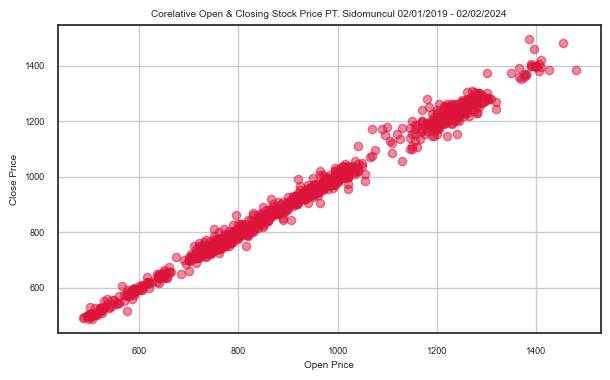

In [15]:
plt.figure(figsize=(7,4))
plt.scatter(x=df['Open'],y=Y, c='crimson',alpha=0.5)
plt.title('Corelative Open & Closing Stock Price PT. Sidomuncul 02/01/2019 - 02/02/2024')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid(True)

sns.set_theme(style='white',font_scale=0.4)

plt.show()

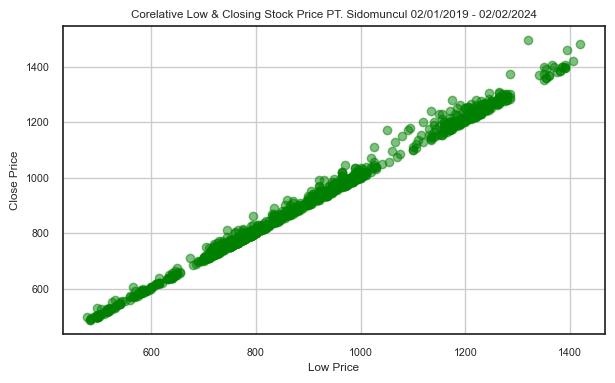

In [19]:
plt.figure(figsize=(7,4))
plt.scatter(x=df['Low'],y=Y, c='green',alpha=0.5)
plt.title('Corelative Low & Closing Stock Price PT. Sidomuncul 02/01/2019 - 02/02/2024')
plt.xlabel('Low Price')
plt.ylabel('Close Price')
plt.grid(True)

sns.set_theme(style='white',font_scale=0.5)

plt.show()

#### Normalisasi data

In [20]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

scaled_X = min_max_scaler.fit_transform(X)
scaled_Y = min_max_scaler.fit_transform(Y)

print('Data X setelah dinormalisasi\n',scaled_X)
print('Data Y setelah dinormalisasi\n',scaled_Y)

Data X setelah dinormalisasi
 [[0.35613682 0.34197887 0.37898089]
 [0.361167   0.35158501 0.37898089]
 [0.36619718 0.35158501 0.3895966 ]
 ...
 [0.01911469 0.01536984 0.02866242]
 [0.02414487 0.01536984 0.02335456]
 [0.01911469 0.01056676 0.02335456]]
Data Y setelah dinormalisasi
 [[0.35579782]
 [0.37066402]
 [0.36570862]
 ...
 [0.02378593]
 [0.01883053]
 [0.01387512]]


In [21]:
scaled_X = np.array(scaled_X)
scaled_Y = np.array(scaled_Y)

In [22]:
scaled_X

array([[0.35613682, 0.34197887, 0.37898089],
       [0.361167  , 0.35158501, 0.37898089],
       [0.36619718, 0.35158501, 0.3895966 ],
       ...,
       [0.01911469, 0.01536984, 0.02866242],
       [0.02414487, 0.01536984, 0.02335456],
       [0.01911469, 0.01056676, 0.02335456]])

In [23]:
scaled_Y

array([[0.35579782],
       [0.37066402],
       [0.36570862],
       ...,
       [0.02378593],
       [0.01883053],
       [0.01387512]])

#### Train test split

In [236]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,scaled_Y,test_size=0.10,random_state=40)

#### Pemodelan NN

In [237]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=1,input_shape=[3]),
        # tf.keras.layers.Dense(units=1,input_shape=[3])
])

In [238]:
model.compile(
    loss='mae',
    optimizer='sgd',
    metrics=['accuracy']
)

In [239]:
model.fit(
    X_train,Y_train,epochs=100
)

Epoch 1/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3316 - accuracy: 0.0018
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1453 - accuracy: 0.0018
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1191 - accuracy: 0.0018
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0963 - accuracy: 0.0018
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0742 - accuracy: 0.0018
Epoch 6/100
35/35 [==============================] - 0s 1ms/step - loss: 0.0524 - accuracy: 0.0018
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 0.0018
Epoch 8/100
35/35 [==============================] - 0s 1ms/step - loss: 0.0153 - accuracy: 0.0018
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.0018
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0102 - accuracy: 0.0018
Epoch 11/

#### Tes prediksi harga penutupan saham

In [240]:
prediksi_harga = model.predict(X_test)

print(prediksi_harga)

4/4 [==============================] - 0s 6ms/step
[[0.3101518 ]
 [0.38444337]
 [0.08863054]
 [0.294503  ]
 [0.24462497]
 [0.28442192]
 [0.30515572]
 [0.7012074 ]
 [0.7495037 ]
 [0.64793444]
 [0.23905721]
 [0.4454569 ]
 [0.24462497]
 [0.28494912]
 [0.30537307]
 [0.87920374]
 [0.40276554]
 [0.34994873]
 [0.42213506]
 [0.49081802]
 [0.46351367]
 [0.30484584]
 [0.66758   ]
 [0.319971  ]
 [0.59429836]
 [0.27859238]
 [0.27911958]
 [0.28494912]
 [0.31891656]
 [0.2990163 ]
 [0.33509254]
 [0.3605872 ]
 [0.48472658]
 [0.12869292]
 [0.42450574]
 [0.31759673]
 [0.7383309 ]
 [0.30007073]
 [0.09871159]
 [0.7346476 ]
 [0.25843027]
 [0.10774178]
 [0.48604283]
 [0.2998089 ]
 [0.41998887]
 [0.7375792 ]
 [0.5202758 ]
 [0.27512988]
 [0.28998968]
 [0.50410324]
 [0.15231746]
 [0.7808013 ]
 [0.2793814 ]
 [0.25790307]
 [0.47385296]
 [0.35472745]
 [0.47065946]
 [0.68235797]
 [0.01366495]
 [0.27328643]
 [0.319971  ]
 [0.7431096 ]
 [0.7165943 ]
 [0.43988913]
 [0.8215509 ]
 [0.781325  ]
 [0.46084028]
 [0.1687552

#### Prediksi ANN (2)

In [241]:
prediksi_harga_dua = model.predict(scaled_X)

prediksi_harga_dua

39/39 [==============================] - 0s 953us/step


array([[0.35472745],
       [0.3534112 ],
       [0.3648085 ],
       ...,
       [0.02336913],
       [0.01806321],
       [0.01859042]], dtype=float32)

In [242]:
inversed_prediksi_harga_dua = min_max_scaler.inverse_transform(prediksi_harga_dua)

inversed_prediksi_harga_dua

array([[843.92   ],
       [842.5919 ],
       [854.0918 ],
       ...,
       [509.57947],
       [504.2258 ],
       [504.75775]], dtype=float32)

In [243]:
inversed_prediksi_harga_dua = inversed_prediksi_harga_dua.reshape(-1)

inversed_prediksi_harga_dua

array([843.92   , 842.5919 , 854.0918 , ..., 509.57947, 504.2258 ,
       504.75775], dtype=float32)

In [244]:
prediksi_harga_reshape = prediksi_harga.reshape(-1,1)

In [508]:
# correct_pred = tf.equal(tf.argmax(prediksi_harga_reshape,1),tf.argmax(Y_test_reshape,1))

# correct_pred

In [245]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [246]:
Y_test_res = Y_test.reshape(-1,1)

Y_test_res

array([[0.3012884 ],
       [0.37561943],
       [0.08325074],
       [0.2864222 ],
       [0.23686819],
       [0.2765114 ],
       [0.31615461],
       [0.69772052],
       [0.78196234],
       [0.6531219 ],
       [0.23191278],
       [0.44499504],
       [0.24182359],
       [0.2814668 ],
       [0.30624381],
       [0.86620416],
       [0.42021804],
       [0.35084242],
       [0.43012884],
       [0.48463826],
       [0.45986125],
       [0.296333  ],
       [0.73736373],
       [0.31615461],
       [0.59365709],
       [0.2765114 ],
       [0.2814668 ],
       [0.2814668 ],
       [0.33102081],
       [0.296333  ],
       [0.32606541],
       [0.35579782],
       [0.49950446],
       [0.12784936],
       [0.41526264],
       [0.31119921],
       [0.72745292],
       [0.296333  ],
       [0.09811695],
       [0.75222993],
       [0.26164519],
       [0.10307235],
       [0.47968285],
       [0.2913776 ],
       [0.41030723],
       [0.78691774],
       [0.51437066],
       [0.271

In [247]:
Y_test.size

125

In [248]:
prediksi_harga.reshape(-1)

array([0.3101518 , 0.38444337, 0.08863054, 0.294503  , 0.24462497,
       0.28442192, 0.30515572, 0.7012074 , 0.7495037 , 0.64793444,
       0.23905721, 0.4454569 , 0.24462497, 0.28494912, 0.30537307,
       0.87920374, 0.40276554, 0.34994873, 0.42213506, 0.49081802,
       0.46351367, 0.30484584, 0.66758   , 0.319971  , 0.59429836,
       0.27859238, 0.27911958, 0.28494912, 0.31891656, 0.2990163 ,
       0.33509254, 0.3605872 , 0.48472658, 0.12869292, 0.42450574,
       0.31759673, 0.7383309 , 0.30007073, 0.09871159, 0.7346476 ,
       0.25843027, 0.10774178, 0.48604283, 0.2998089 , 0.41998887,
       0.7375792 , 0.5202758 , 0.27512988, 0.28998968, 0.50410324,
       0.15231746, 0.7808013 , 0.2793814 , 0.25790307, 0.47385296,
       0.35472745, 0.47065946, 0.68235797, 0.01366495, 0.27328643,
       0.319971  , 0.7431096 , 0.7165943 , 0.43988913, 0.8215509 ,
       0.781325  , 0.46084028, 0.16875526, 0.7939065 , 0.5874251 ,
       0.41867262, 0.64452004, 0.09792256, 0.47411478, 0.42823

In [249]:
print(prediksi_harga.shape)
print(Y_test.shape)

(125, 1)
(125,)


#### Tes prediksi harga penutupan saham dengan nilai tertentu

In [250]:
prediksi_harga_uji = model.predict([[500,510,498]]) 

print('Harga prediksi penutupan saham : ',prediksi_harga_uji[0][0])

1/1 [==============================] - 0s 98ms/step
Harga prediksi penutupan saham :  464.6215


#### Cek akurasi model

In [251]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_pred=prediksi_harga,y_true=Y_test)
print('MAE : ',mae)

mse = mean_squared_error(y_pred=prediksi_harga,y_true=Y_test)
print('MSE : ',mse)

MAE :  0.012768909263480874
MSE :  0.0007968000833589599


#### Denormalisasi nilai harga prediksi

In [252]:
# Nilai Y-test

inversed_scaled_Y_test = min_max_scaler.inverse_transform(Y_test_res)

inversed_scaled_Y_test

array([[ 790.],
       [ 865.],
       [ 570.],
       [ 775.],
       [ 725.],
       [ 765.],
       [ 805.],
       [1190.],
       [1275.],
       [1145.],
       [ 720.],
       [ 935.],
       [ 730.],
       [ 770.],
       [ 795.],
       [1360.],
       [ 910.],
       [ 840.],
       [ 920.],
       [ 975.],
       [ 950.],
       [ 785.],
       [1230.],
       [ 805.],
       [1085.],
       [ 765.],
       [ 770.],
       [ 770.],
       [ 820.],
       [ 785.],
       [ 815.],
       [ 845.],
       [ 990.],
       [ 615.],
       [ 905.],
       [ 800.],
       [1220.],
       [ 785.],
       [ 585.],
       [1245.],
       [ 750.],
       [ 590.],
       [ 970.],
       [ 780.],
       [ 900.],
       [1280.],
       [1005.],
       [ 760.],
       [ 775.],
       [1005.],
       [ 640.],
       [1280.],
       [ 760.],
       [ 765.],
       [ 985.],
       [ 845.],
       [ 955.],
       [1165.],
       [ 500.],
       [ 760.],
       [ 800.],
       [1235.],
       [

In [253]:
inversed_prediksi_harga = min_max_scaler.inverse_transform(prediksi_harga)

inversed_prediksi_harga

array([[ 798.9431 ],
       [ 873.9033 ],
       [ 575.4282 ],
       [ 783.1535 ],
       [ 732.8266 ],
       [ 772.9817 ],
       [ 793.9021 ],
       [1193.5183 ],
       [1242.2491 ],
       [1139.7659 ],
       [ 727.2087 ],
       [ 935.466  ],
       [ 732.8266 ],
       [ 773.5137 ],
       [ 794.12146],
       [1373.1165 ],
       [ 892.3904 ],
       [ 839.09827],
       [ 911.93427],
       [ 981.2354 ],
       [ 953.6853 ],
       [ 793.5894 ],
       [1159.5883 ],
       [ 808.8507 ],
       [1085.6471 ],
       [ 767.0997 ],
       [ 767.63165],
       [ 773.5137 ],
       [ 807.7868 ],
       [ 787.70746],
       [ 824.1084 ],
       [ 849.83246],
       [ 975.0891 ],
       [ 615.85114],
       [ 914.32623],
       [ 806.4551 ],
       [1230.9758 ],
       [ 788.77136],
       [ 585.60004],
       [1227.2594 ],
       [ 746.7561 ],
       [ 594.7114 ],
       [ 976.4172 ],
       [ 788.50714],
       [ 909.7688 ],
       [1230.2174 ],
       [1010.9582 ],
       [ 763.

In [254]:
inversed_prediksi_harga.shape

(125, 1)

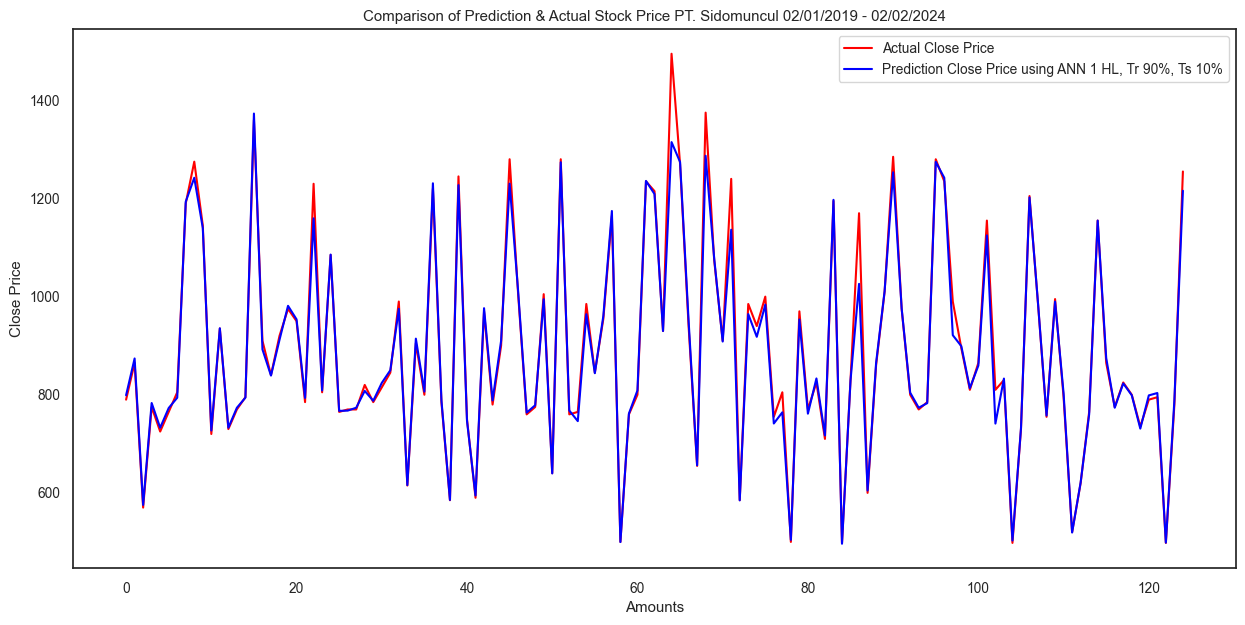

In [255]:
plt.figure(figsize=(15,7))
sns.set_theme(style='white',font_scale=0.9)

plt.plot(inversed_scaled_Y_test,color='red',label='Actual Close Price')
plt.plot(inversed_prediksi_harga,color='blue',label='Prediction Close Price using ANN 1 HL, Tr 90%, Ts 10%')
plt.xlabel('Amounts')
plt.ylabel('Close Price')
plt.legend()
plt.title('Comparison of Prediction & Actual Stock Price PT. Sidomuncul 02/01/2019 - 02/02/2024')

plt.show()

#### (Trial) Head-to Head Prediction w/ Datetime

In [256]:
Y_test_reshape = Y_test.reshape(-1)

In [257]:
pred_harga_reshape = prediksi_harga.reshape(-1)

In [258]:
inversed_scaled_Y_test = inversed_scaled_Y_test.reshape(-1)

In [259]:
scaled_Y = scaled_Y.reshape(-1)

In [260]:
prediksi_harga_dua = prediksi_harga_dua.reshape(-1)

In [261]:
df_y_test = pd.DataFrame({'Testing Data':scaled_Y})
df_pred = pd.DataFrame({'Prediction':prediksi_harga_dua})

In [262]:
df_y_test

,Testing Data
0,0.355798
1,0.370664
2,0.365709
3,0.365709
4,0.360753
...,...
1238,0.018831
1239,0.018831
1240,0.023786
1241,0.018831


In [263]:
df_pred

,Prediction
0,0.354727
1,0.353411
2,0.364808
3,0.375417
4,0.365070
...,...
1238,0.015312
1239,0.017801
1240,0.023369
1241,0.018063


In [264]:
df['Date'].dt.year

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
1238    2024
1239    2024
1240    2024
1241    2024
1242    2024
Name: Date, Length: 1243, dtype: int64

In [265]:
combined = pd.concat([df['Date'],df_y_test,df_pred],axis=1)
combined.columns = ['Date','Actual','Prediction']

In [266]:
combined['Diff'] = (combined['Actual']-combined['Prediction']).abs()
combined

,Date,Actual,Prediction,Diff
0,2019-01-02,0.355798,0.354727,0.001070
1,2019-01-03,0.370664,0.353411,0.017253
2,2019-01-04,0.365709,0.364808,0.000900
3,2019-01-07,0.365709,0.375417,0.009708
4,2019-01-08,0.360753,0.365070,0.004317
...,...,...,...,...
1238,2024-01-29,0.018831,0.015312,0.003518
1239,2024-01-30,0.018831,0.017801,0.001029
1240,2024-01-31,0.023786,0.023369,0.000417
1241,2024-02-01,0.018831,0.018063,0.000767


In [267]:
check_nan = combined[pd.isnull(combined).any(axis=1)]
check_nan

,Date,Actual,Prediction,Diff


In [268]:
df = df.merge(df_pred,how='left',left_index=True,right_index=True)

df['Date'] = pd.to_datetime(df['Date'])

In [269]:
df

,Date,Open,High,Low,Close,Volume,AdjustedClose,Prediction_x,Prediction SVR,Prediction_y
0,2019-01-02,840.0,850.0,835.0,845.0,694300,422.5,0.344347,0.351084,0.354727
1,2019-01-03,845.0,860.0,835.0,860.0,1394700,430.0,0.356719,0.355717,0.353411
2,2019-01-04,850.0,860.0,845.0,855.0,271000,427.5,0.353971,0.360926,0.364808
3,2019-01-07,855.0,865.0,855.0,855.0,1082900,427.5,0.357338,0.367706,0.375417
4,2019-01-08,855.0,860.0,845.0,850.0,296200,425.0,0.354111,0.362419,0.365070
...,...,...,...,...,...,...,...,...,...,...
1238,2024-01-29,500.0,510.0,498.0,505.0,17513400,505.0,0.016269,0.017567,0.015312
1239,2024-01-30,505.0,510.0,500.0,505.0,7321900,505.0,0.015832,0.019803,0.017801
1240,2024-01-31,505.0,510.0,505.0,510.0,6634000,510.0,0.014387,0.021662,0.023369
1241,2024-02-01,510.0,510.0,500.0,505.0,10976800,505.0,0.015973,0.021296,0.018063


In [270]:
df.drop(columns='Prediction_x',inplace=True)

In [271]:
df.set_index(df['Date'])

,Date,Open,High,Low,Close,Volume,AdjustedClose,Prediction SVR,Prediction_y
Date,,,,,,,,,
2019-01-02,2019-01-02,840.0,850.0,835.0,845.0,694300,422.5,0.351084,0.354727
2019-01-03,2019-01-03,845.0,860.0,835.0,860.0,1394700,430.0,0.355717,0.353411
2019-01-04,2019-01-04,850.0,860.0,845.0,855.0,271000,427.5,0.360926,0.364808
2019-01-07,2019-01-07,855.0,865.0,855.0,855.0,1082900,427.5,0.367706,0.375417
2019-01-08,2019-01-08,855.0,860.0,845.0,850.0,296200,425.0,0.362419,0.365070
...,...,...,...,...,...,...,...,...,...
2024-01-29,2024-01-29,500.0,510.0,498.0,505.0,17513400,505.0,0.017567,0.015312
2024-01-30,2024-01-30,505.0,510.0,500.0,505.0,7321900,505.0,0.019803,0.017801
2024-01-31,2024-01-31,505.0,510.0,505.0,510.0,6634000,510.0,0.021662,0.023369


In [272]:
df.rename({'Prediction_y':"Prediction"},inplace=True,axis=1)

In [273]:
df

,Date,Open,High,Low,Close,Volume,AdjustedClose,Prediction SVR,Prediction
0,2019-01-02,840.0,850.0,835.0,845.0,694300,422.5,0.351084,0.354727
1,2019-01-03,845.0,860.0,835.0,860.0,1394700,430.0,0.355717,0.353411
2,2019-01-04,850.0,860.0,845.0,855.0,271000,427.5,0.360926,0.364808
3,2019-01-07,855.0,865.0,855.0,855.0,1082900,427.5,0.367706,0.375417
4,2019-01-08,855.0,860.0,845.0,850.0,296200,425.0,0.362419,0.365070
...,...,...,...,...,...,...,...,...,...
1238,2024-01-29,500.0,510.0,498.0,505.0,17513400,505.0,0.017567,0.015312
1239,2024-01-30,505.0,510.0,500.0,505.0,7321900,505.0,0.019803,0.017801
1240,2024-01-31,505.0,510.0,505.0,510.0,6634000,510.0,0.021662,0.023369
1241,2024-02-01,510.0,510.0,500.0,505.0,10976800,505.0,0.021296,0.018063


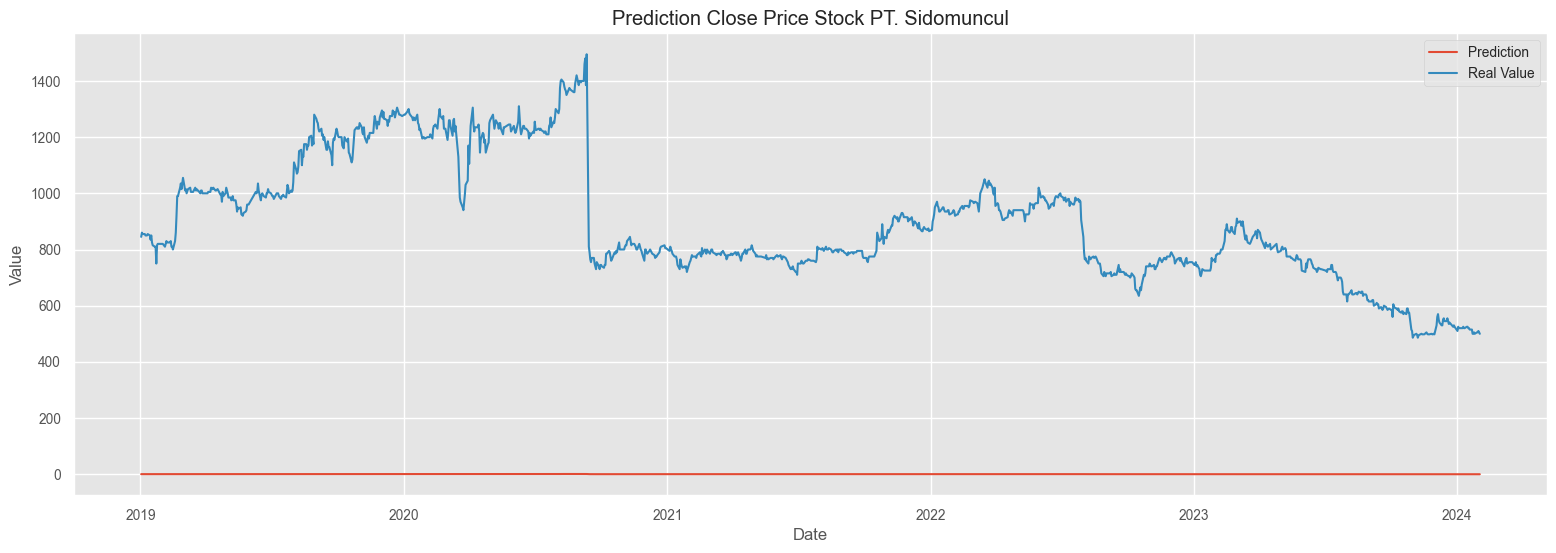

In [274]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(19,6))

x= df['Date']
y = df['Prediction']
z = df['Close']

plt.plot(x,y)
plt.plot(x,z)
plt.xlabel('Date')
plt.ylabel('Value')

plt.legend(['Prediction','Real Value'])
plt.title('Prediction Close Price Stock PT. Sidomuncul')
plt.show()

In [275]:
combined.isnull().sum()

Date          0
Actual        0
Prediction    0
Diff          0
dtype: int64

In [277]:
combined.dropna(inplace=True)

In [278]:
combined

,Date,Actual,Prediction,Diff
0,2019-01-02,0.355798,0.354727,0.001070
1,2019-01-03,0.370664,0.353411,0.017253
2,2019-01-04,0.365709,0.364808,0.000900
3,2019-01-07,0.365709,0.375417,0.009708
4,2019-01-08,0.360753,0.365070,0.004317
...,...,...,...,...
1238,2024-01-29,0.018831,0.015312,0.003518
1239,2024-01-30,0.018831,0.017801,0.001029
1240,2024-01-31,0.023786,0.023369,0.000417
1241,2024-02-01,0.018831,0.018063,0.000767


In [279]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1243 non-null   datetime64[ns]
 1   Actual      1243 non-null   float64       
 2   Prediction  1243 non-null   float32       
 3   Diff        1243 non-null   float64       
dtypes: datetime64[ns](1), float32(1), float64(2)
memory usage: 34.1 KB


In [280]:
combined['Date']

0      2019-01-02
1      2019-01-03
2      2019-01-04
3      2019-01-07
4      2019-01-08
          ...    
1238   2024-01-29
1239   2024-01-30
1240   2024-01-31
1241   2024-02-01
1242   2024-02-02
Name: Date, Length: 1243, dtype: datetime64[ns]

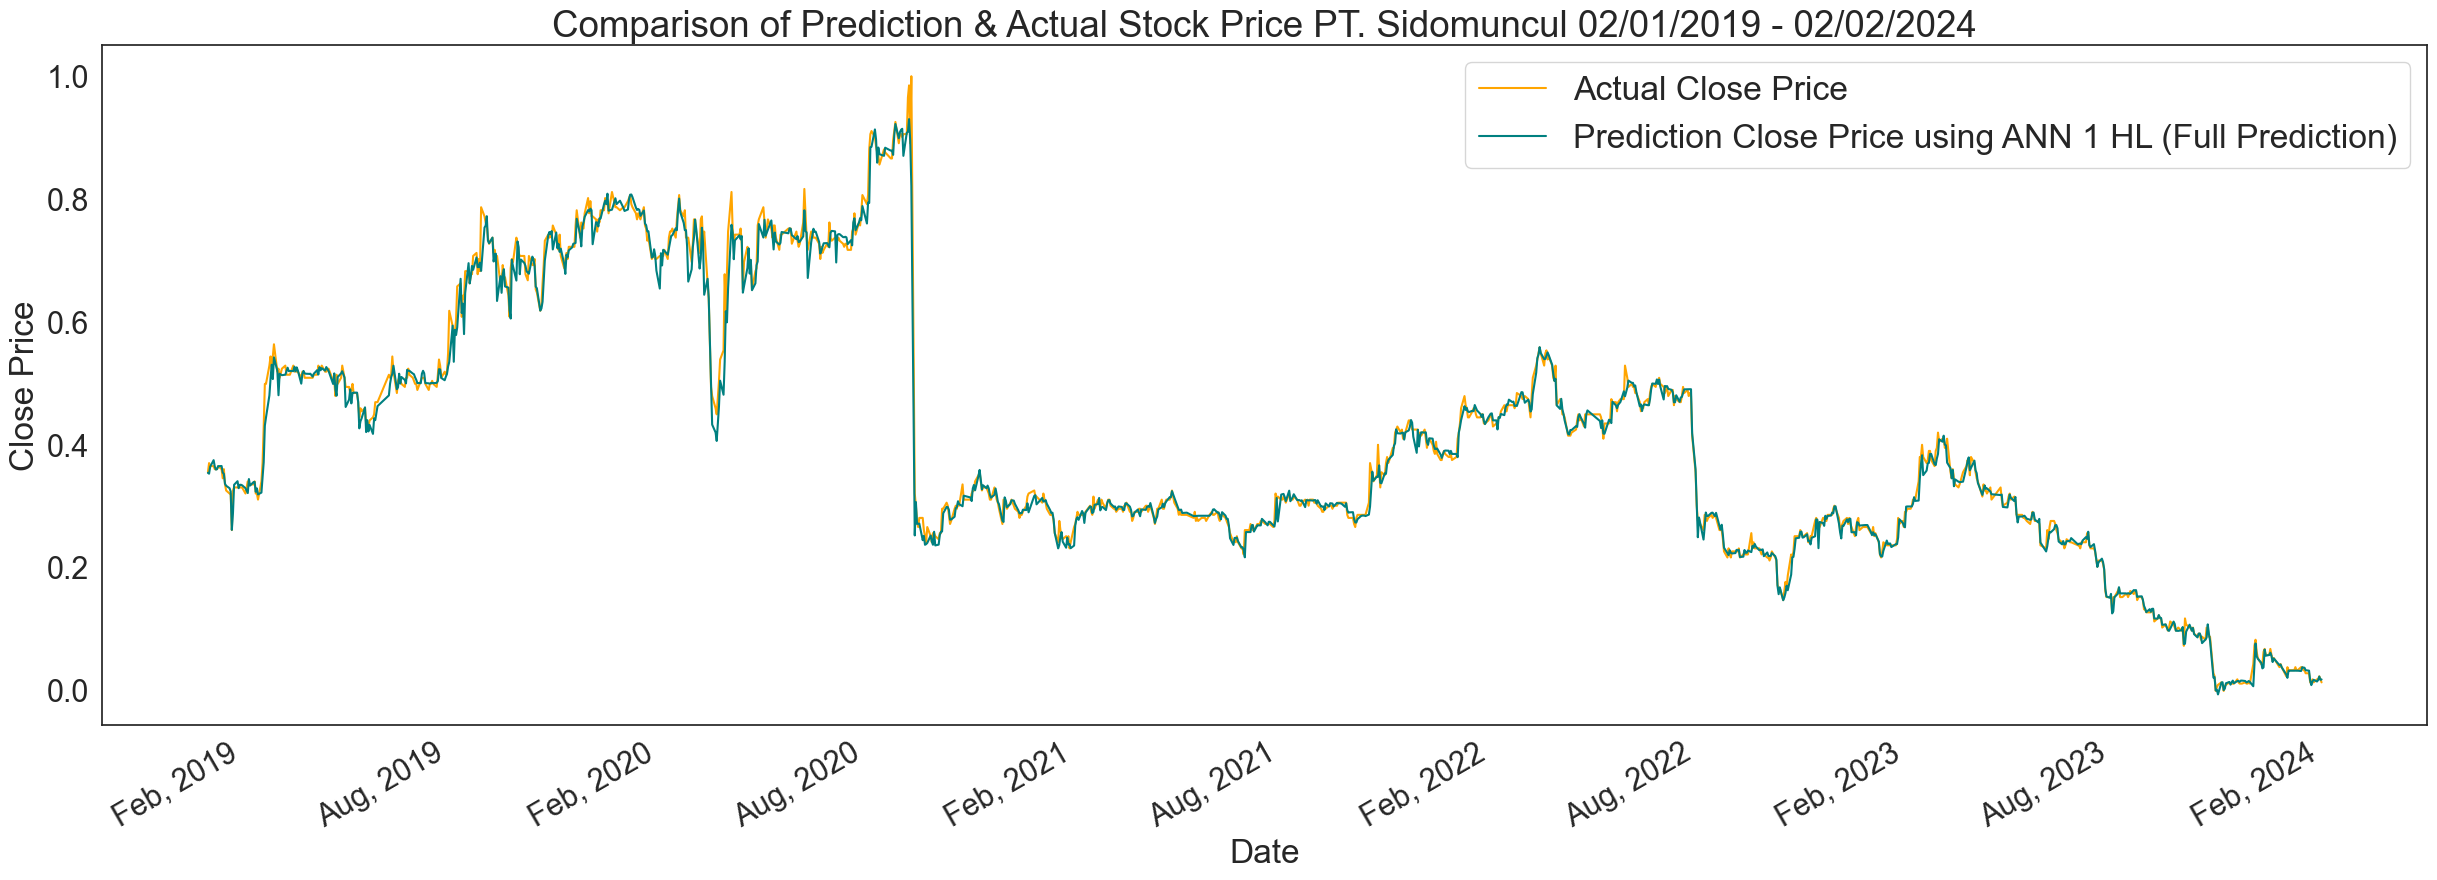

In [282]:
half_year_locator = mdates.MonthLocator(interval=6)
year_month_formatter = mdates.DateFormatter("%Y-%m")
month_year_formatter = mdates.DateFormatter('%b, %Y')

fig,ax = plt.subplots(figsize=(30,10))
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)
ax.xaxis.set_major_formatter(month_year_formatter)

fig.autofmt_xdate()

# plt.figure(figsize=(25,7))
sns.set_theme(style='white',font_scale=2.2)


plt.plot(combined['Date'],combined['Actual'],color='orange',label='Actual Close Price')
plt.plot(combined['Date'],combined['Prediction'],color='teal',label='Prediction Close Price using ANN 1 HL (Full Prediction)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.title('Comparison of Prediction & Actual Stock Price PT. Sidomuncul 02/01/2019 - 02/02/2024')
plt.show()

#### Prediksi dengan SVR

In [283]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear',epsilon=0.001,gamma=0.01,C=0.01)

svr_model.fit(X_train,Y_train)

SVR(C=0.01, epsilon=0.001, gamma=0.01, kernel='linear')

In [284]:
prediksi = svr_model.predict(X_test)

prediksi

array([0.30559127, 0.38409226, 0.09040285, 0.29388006, 0.24157191,
       0.28403093, 0.31351886, 0.69590992, 0.75740552, 0.69752613,
       0.23970984, 0.44012456, 0.24157191, 0.28096844, 0.30215918,
       0.8651297 , 0.40543806, 0.34805029, 0.43275378, 0.49049309,
       0.46602533, 0.30522167, 0.70214456, 0.31394793, 0.60466645,
       0.28067637, 0.27761389, 0.28096844, 0.3200729 , 0.30186711,
       0.32872162, 0.39187884, 0.48564606, 0.1283069 , 0.42199631,
       0.33075284, 0.72873433, 0.29574214, 0.10025198, 0.73807686,
       0.26097811, 0.11017865, 0.48101356, 0.29424966, 0.42005669,
       0.75525138, 0.51556306, 0.27261179, 0.28589301, 0.5008669 ,
       0.15606975, 0.78082795, 0.27910636, 0.2640406 , 0.48341438,
       0.35148237, 0.46474739, 0.6776266 , 0.01422032, 0.28030677,
       0.31394793, 0.73216642, 0.70612865, 0.43826248, 0.89731532,
       0.7838129 , 0.45639073, 0.16621095, 0.82750846, 0.58929455,
       0.42468919, 0.69626625, 0.10182199, 0.48490686, 0.43155

In [285]:
pred_reshape = prediksi.reshape(-1,1)

pred_reshape

array([[0.30559127],
       [0.38409226],
       [0.09040285],
       [0.29388006],
       [0.24157191],
       [0.28403093],
       [0.31351886],
       [0.69590992],
       [0.75740552],
       [0.69752613],
       [0.23970984],
       [0.44012456],
       [0.24157191],
       [0.28096844],
       [0.30215918],
       [0.8651297 ],
       [0.40543806],
       [0.34805029],
       [0.43275378],
       [0.49049309],
       [0.46602533],
       [0.30522167],
       [0.70214456],
       [0.31394793],
       [0.60466645],
       [0.28067637],
       [0.27761389],
       [0.28096844],
       [0.3200729 ],
       [0.30186711],
       [0.32872162],
       [0.39187884],
       [0.48564606],
       [0.1283069 ],
       [0.42199631],
       [0.33075284],
       [0.72873433],
       [0.29574214],
       [0.10025198],
       [0.73807686],
       [0.26097811],
       [0.11017865],
       [0.48101356],
       [0.29424966],
       [0.42005669],
       [0.75525138],
       [0.51556306],
       [0.272

#### Prediksi SVR (2)

In [286]:
pred_svr_dua = svr_model.predict(scaled_X)

In [287]:
pred_svr_dua = np.array(pred_svr_dua)

pred_svr_dua = pred_svr_dua.reshape(1,-1)

In [288]:
pred_svr_dua

array([[0.35148237, 0.35611487, 0.36133151, ..., 0.02182853, 0.02145893,
        0.01839644]])

In [289]:
inv_pred_svr_dua = min_max_scaler.inverse_transform(pred_svr_dua)

inv_pred_svr_dua

array([[840.64571599, 845.31990566, 850.58348994, ..., 508.02498594,
        507.65205671, 504.56200757]])

In [290]:
pred_svr_dua = pred_svr_dua.reshape(-1)

In [291]:
df_pred_svr_dua = pd.DataFrame({'Prediction SVR':pred_svr_dua})

type(df_pred_svr_dua)

pandas.core.frame.DataFrame

In [292]:
combined = pd.concat([df['Date'],df_y_test,df_pred_svr_dua],axis=1)
combined.columns = ['Date','Actual','Prediction SVR']

#### Denormalisasi nilai prediksi

In [293]:
df = df.merge(df_pred_svr_dua,how='left',left_index=True,right_index=True)

df

,Date,Open,High,Low,Close,Volume,AdjustedClose,Prediction SVR_x,Prediction,Prediction SVR_y
0,2019-01-02,840.0,850.0,835.0,845.0,694300,422.5,0.351084,0.354727,0.351482
1,2019-01-03,845.0,860.0,835.0,860.0,1394700,430.0,0.355717,0.353411,0.356115
2,2019-01-04,850.0,860.0,845.0,855.0,271000,427.5,0.360926,0.364808,0.361332
3,2019-01-07,855.0,865.0,855.0,855.0,1082900,427.5,0.367706,0.375417,0.368118
4,2019-01-08,855.0,860.0,845.0,850.0,296200,425.0,0.362419,0.365070,0.362824
...,...,...,...,...,...,...,...,...,...,...
1238,2024-01-29,500.0,510.0,498.0,505.0,17513400,505.0,0.017567,0.015312,0.017729
1239,2024-01-30,505.0,510.0,500.0,505.0,7321900,505.0,0.019803,0.017801,0.019966
1240,2024-01-31,505.0,510.0,505.0,510.0,6634000,510.0,0.021662,0.023369,0.021829
1241,2024-02-01,510.0,510.0,500.0,505.0,10976800,505.0,0.021296,0.018063,0.021459


In [294]:
df.drop(columns='Prediction SVR_x',inplace=True)

In [295]:
df.rename({'Prediction SVR_y':"Prediction SVR"},inplace=True,axis=1)

In [296]:
df

,Date,Open,High,Low,Close,Volume,AdjustedClose,Prediction,Prediction SVR
0,2019-01-02,840.0,850.0,835.0,845.0,694300,422.5,0.354727,0.351482
1,2019-01-03,845.0,860.0,835.0,860.0,1394700,430.0,0.353411,0.356115
2,2019-01-04,850.0,860.0,845.0,855.0,271000,427.5,0.364808,0.361332
3,2019-01-07,855.0,865.0,855.0,855.0,1082900,427.5,0.375417,0.368118
4,2019-01-08,855.0,860.0,845.0,850.0,296200,425.0,0.365070,0.362824
...,...,...,...,...,...,...,...,...,...
1238,2024-01-29,500.0,510.0,498.0,505.0,17513400,505.0,0.015312,0.017729
1239,2024-01-30,505.0,510.0,500.0,505.0,7321900,505.0,0.017801,0.019966
1240,2024-01-31,505.0,510.0,505.0,510.0,6634000,510.0,0.023369,0.021829
1241,2024-02-01,510.0,510.0,500.0,505.0,10976800,505.0,0.018063,0.021459


In [297]:
pred_reshape = pd.DataFrame(pred_reshape)

In [298]:
combined = pd.concat([df['Date'],df_y_test,df_pred_svr_dua],axis=1)
combined.columns = ['Date','Actual','Prediction SVR']

In [299]:
combined

,Date,Actual,Prediction SVR
0,2019-01-02,0.355798,0.351482
1,2019-01-03,0.370664,0.356115
2,2019-01-04,0.365709,0.361332
3,2019-01-07,0.365709,0.368118
4,2019-01-08,0.360753,0.362824
...,...,...,...
1238,2024-01-29,0.018831,0.017729
1239,2024-01-30,0.018831,0.019966
1240,2024-01-31,0.023786,0.021829
1241,2024-02-01,0.018831,0.021459


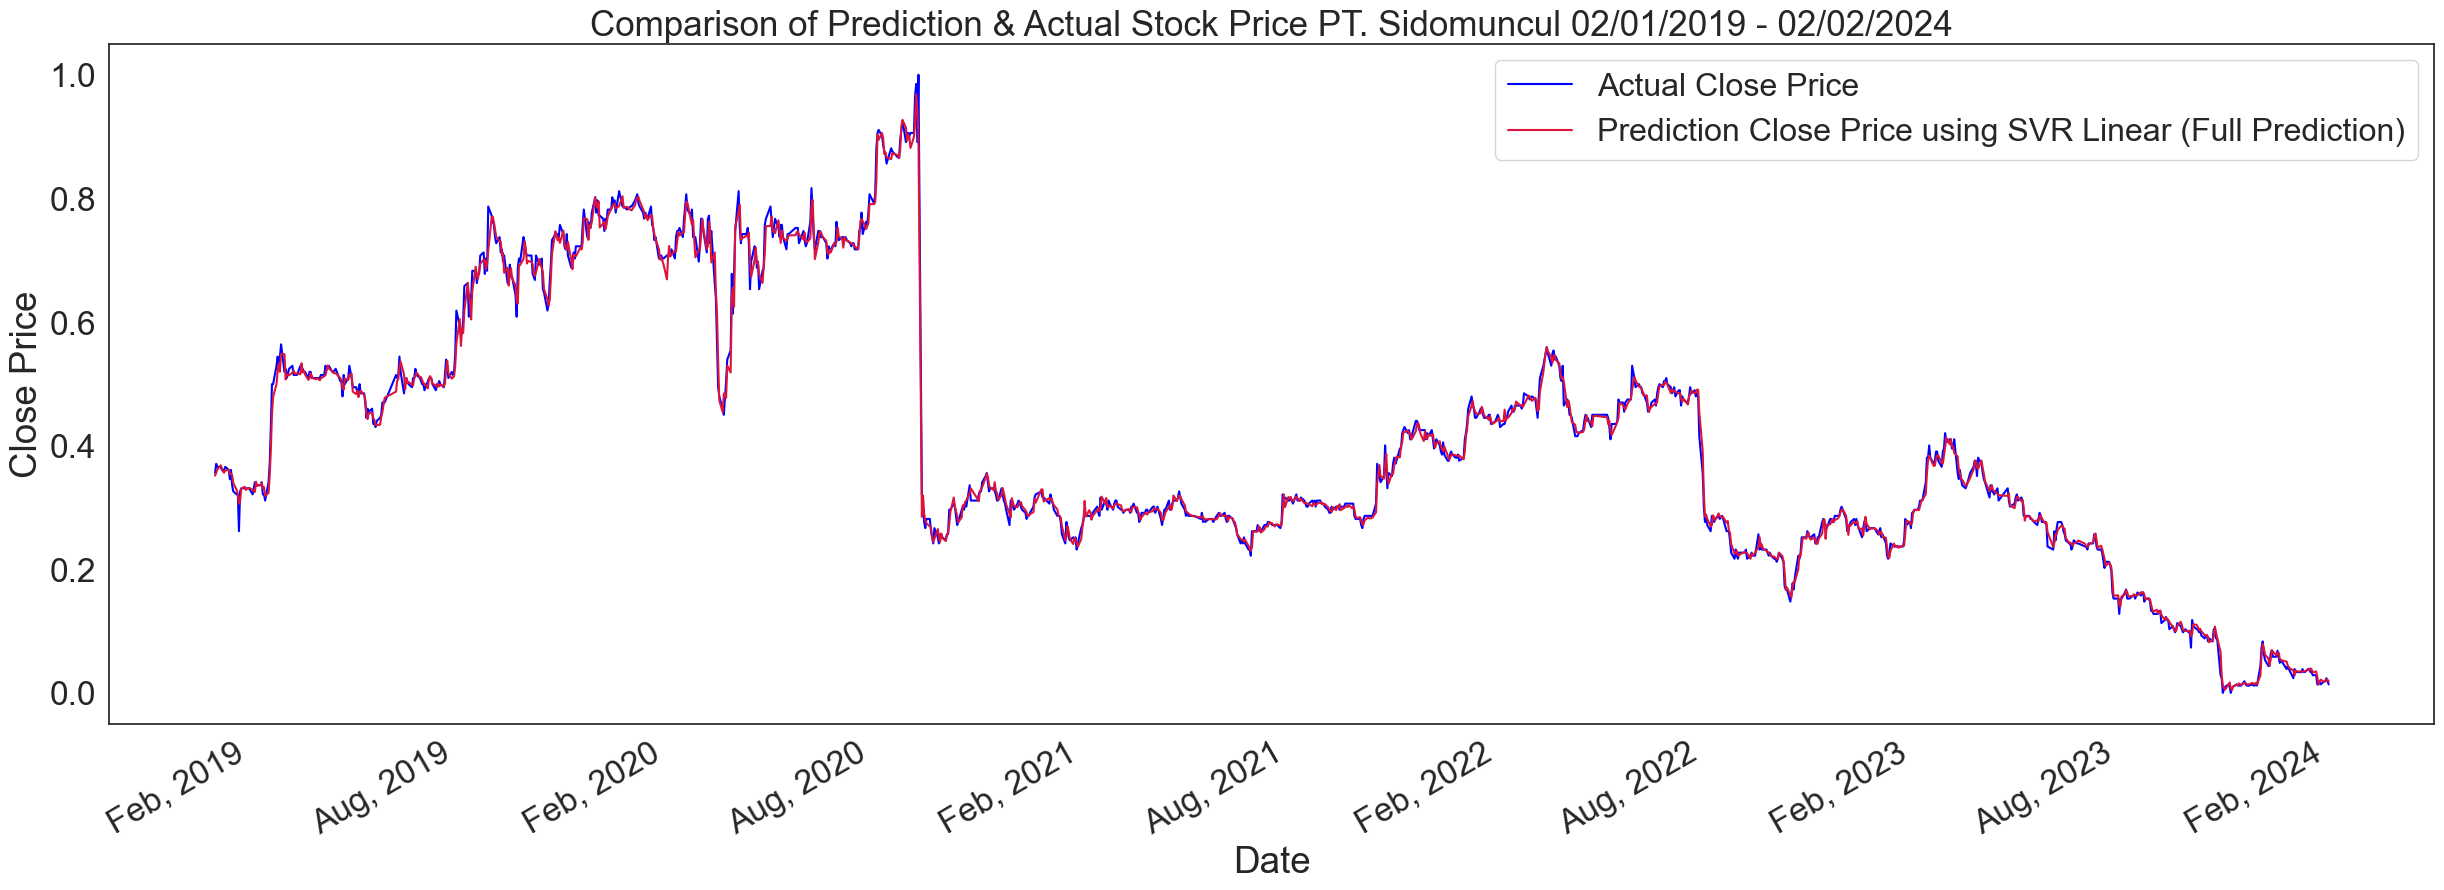

In [300]:
half_year_locator = mdates.MonthLocator(interval=6)
year_month_formatter = mdates.DateFormatter("%Y-%m")
month_year_formatter = mdates.DateFormatter('%b, %Y')

fig,ax = plt.subplots(figsize=(30,10))
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)
ax.xaxis.set_major_formatter(month_year_formatter)

fig.autofmt_xdate()

# plt.figure(figsize=(15,7))
sns.set_theme(style='white',font_scale=2.1)


plt.plot(combined['Date'],combined['Actual'],color='blue',label='Actual Close Price')
plt.plot(combined['Date'],combined['Prediction SVR'],color='crimson',label='Prediction Close Price using SVR Linear (Full Prediction)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.title('Comparison of Prediction & Actual Stock Price PT. Sidomuncul 02/01/2019 - 02/02/2024')
plt.show()

#### Tes model dengan nilai tertentu

In [301]:
uji_prediksi = svr_model.predict([[840,850,835]])
print('Harga prediksi penutupan saham dengan SVR: ',uji_prediksi[0])

Harga prediksi penutupan saham dengan SVR:  820.0085460748119


#### Cek akurasi model SVR

In [302]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(Y_test,prediksi)
mse = mean_squared_error(Y_test,prediksi)

print('Nilai MAE : ',mae)
print('Nilai MSE : ',mse)

Nilai MAE :  0.009972481859154109
Nilai MSE :  0.00028929293577473507


In [303]:
from sklearn.metrics import r2_score
print('Hasil R2 Score : ',r2_score(Y_test,prediksi)*100)

Hasil R2 Score :  99.36956639446774


In [304]:
inversed_prediksi_svr = min_max_scaler.inverse_transform(pred_reshape)

inversed_prediksi_svr

array([[ 794.34159268],
       [ 873.54908698],
       [ 577.21647436],
       [ 782.52498089],
       [ 729.746062  ],
       [ 772.58720694],
       [ 802.34052727],
       [1188.17310697],
       [1250.22217327],
       [1189.80386123],
       [ 727.86722416],
       [ 930.08568155],
       [ 729.746062  ],
       [ 769.4971578 ],
       [ 790.87861431],
       [1358.91587005],
       [ 895.08700735],
       [ 837.18273762],
       [ 922.64856212],
       [ 980.90753067],
       [ 956.21955965],
       [ 793.96866344],
       [1194.46385924],
       [ 802.77345803],
       [1096.1084451 ],
       [ 769.2024605 ],
       [ 766.11241136],
       [ 769.4971578 ],
       [ 808.9535563 ],
       [ 790.583917  ],
       [ 817.68011896],
       [ 881.40574937],
       [ 976.01687563],
       [ 615.46166156],
       [ 911.79427418],
       [ 819.72961231],
       [1221.29294334],
       [ 784.40381873],
       [ 587.15424831],
       [1230.7195546 ],
       [ 749.32691259],
       [ 597.170

#### Visualisasi perbandingan algoritma

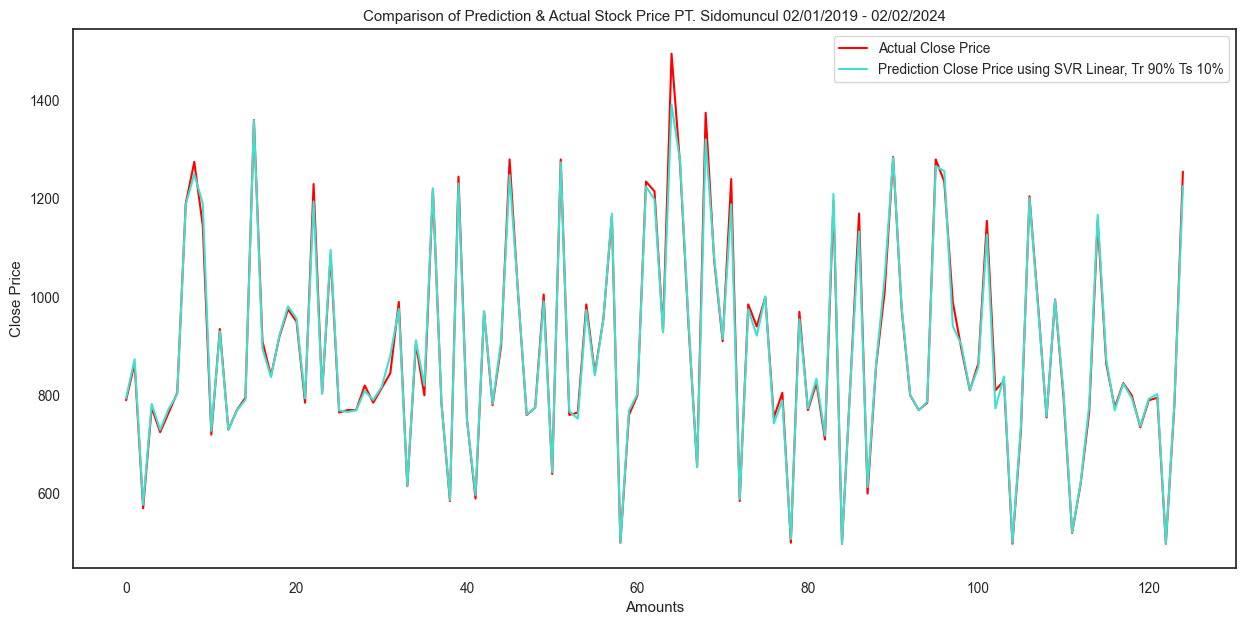

In [305]:
plt.figure(figsize=(15,7))
sns.set_theme(style='white',font_scale=0.9)

plt.plot(inversed_scaled_Y_test,color='red',label='Actual Close Price')
# plt.plot(inversed_prediksi_harga,color='blue',label='Prediction Close Price using ANN')
plt.plot(inversed_prediksi_svr,color='turquoise',label='Prediction Close Price using SVR Linear, Tr 90% Ts 10%')
plt.xlabel('Amounts')
plt.ylabel('Close Price')
plt.legend()
plt.title('Comparison of Prediction & Actual Stock Price PT. Sidomuncul 02/01/2019 - 02/02/2024')

plt.show()

#### Prediksi dengan KNN

In [306]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=3)

In [307]:
knn_pred = knn_model.predict(X_test)

knn_pred

array([0.30954741, 0.38718203, 0.08820614, 0.2897258 , 0.24182359,
       0.2847704 , 0.32276181, 0.69441691, 0.75553353, 0.70597952,
       0.24017179, 0.44829865, 0.24182359, 0.2781632 , 0.3012884 ,
       0.86620416, 0.40039643, 0.34588702, 0.44003964, 0.48298646,
       0.47307565, 0.30624381, 0.71589032, 0.31450281, 0.60191609,
       0.279815  , 0.2831186 , 0.2781632 , 0.31945821, 0.3029402 ,
       0.33102081, 0.37561943, 0.48463826, 0.13115296, 0.42847704,
       0.32111001, 0.72910472, 0.2996366 , 0.09481335, 0.74066733,
       0.26164519, 0.10472415, 0.48133465, 0.296333  , 0.41691444,
       0.74892633, 0.52428147, 0.2732078 , 0.2847704 , 0.49620086,
       0.15592996, 0.77700694, 0.279815  , 0.25834159, 0.48298646,
       0.35084242, 0.46646845, 0.67789891, 0.01420548, 0.279815  ,
       0.31450281, 0.73571193, 0.71589032, 0.43838784, 0.92732078,
       0.78196234, 0.45986125, 0.16088537, 0.78361414, 0.60026429,
       0.42186984, 0.72084572, 0.09976875, 0.47472745, 0.44003

In [308]:
knn_pred.shape

(125,)

In [309]:
knn_pred = np.array(knn_pred)

knn_pred

array([0.30954741, 0.38718203, 0.08820614, 0.2897258 , 0.24182359,
       0.2847704 , 0.32276181, 0.69441691, 0.75553353, 0.70597952,
       0.24017179, 0.44829865, 0.24182359, 0.2781632 , 0.3012884 ,
       0.86620416, 0.40039643, 0.34588702, 0.44003964, 0.48298646,
       0.47307565, 0.30624381, 0.71589032, 0.31450281, 0.60191609,
       0.279815  , 0.2831186 , 0.2781632 , 0.31945821, 0.3029402 ,
       0.33102081, 0.37561943, 0.48463826, 0.13115296, 0.42847704,
       0.32111001, 0.72910472, 0.2996366 , 0.09481335, 0.74066733,
       0.26164519, 0.10472415, 0.48133465, 0.296333  , 0.41691444,
       0.74892633, 0.52428147, 0.2732078 , 0.2847704 , 0.49620086,
       0.15592996, 0.77700694, 0.279815  , 0.25834159, 0.48298646,
       0.35084242, 0.46646845, 0.67789891, 0.01420548, 0.279815  ,
       0.31450281, 0.73571193, 0.71589032, 0.43838784, 0.92732078,
       0.78196234, 0.45986125, 0.16088537, 0.78361414, 0.60026429,
       0.42186984, 0.72084572, 0.09976875, 0.47472745, 0.44003

In [310]:
inv_knn_pred = knn_pred.reshape(-1,1)

In [311]:
inv_knn_pred = min_max_scaler.inverse_transform(inv_knn_pred)

inv_knn_pred

array([[ 798.33333333],
       [ 876.66666667],
       [ 575.        ],
       [ 778.33333333],
       [ 730.        ],
       [ 773.33333333],
       [ 811.66666667],
       [1186.66666667],
       [1248.33333333],
       [1198.33333333],
       [ 728.33333333],
       [ 938.33333333],
       [ 730.        ],
       [ 766.66666667],
       [ 790.        ],
       [1360.        ],
       [ 890.        ],
       [ 835.        ],
       [ 930.        ],
       [ 973.33333333],
       [ 963.33333333],
       [ 795.        ],
       [1208.33333333],
       [ 803.33333333],
       [1093.33333333],
       [ 768.33333333],
       [ 771.66666667],
       [ 766.66666667],
       [ 808.33333333],
       [ 791.66666667],
       [ 820.        ],
       [ 865.        ],
       [ 975.        ],
       [ 618.33333333],
       [ 918.33333333],
       [ 810.        ],
       [1221.66666667],
       [ 788.33333333],
       [ 581.66666667],
       [1233.33333333],
       [ 750.        ],
       [ 591.666

In [312]:
inv_knn_pred.shape

(125, 1)

In [313]:
inv_knn_pred = pd.DataFrame(inv_knn_pred)

inv_knn_pred

,0
0,798.333333
1,876.666667
2,575.000000
3,778.333333
4,730.000000
...,...
120,795.000000
121,798.333333
122,498.000000
123,788.333333


In [314]:
inv_knn_pred.shape

(125, 1)

In [315]:
inv_knn_pred = inv_knn_pred.rename({0:'Predict KNN'},axis=1)

In [316]:
inv_knn_pred

,Predict KNN
0,798.333333
1,876.666667
2,575.000000
3,778.333333
4,730.000000
...,...
120,795.000000
121,798.333333
122,498.000000
123,788.333333


#### Cek akurasi model KNN Regresi

In [317]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(Y_test,knn_pred)
mae = mean_absolute_error(Y_test,knn_pred)
print('Nilai MAE : ',mae)
print('Nilai MSE : ',mse)

Nilai MAE :  0.009337297654443336
Nilai MSE :  0.0002548629343943271


In [318]:
from math import sqrt
rmse = sqrt(mse)

print('Nilai RMSE : ',rmse)

Nilai RMSE :  0.01596442715522004


#### Prediksi KNN (2)

In [319]:
knn_pred_dua = knn_model.predict(scaled_X)

knn_pred_dua

array([0.35084242, 0.35579782, 0.36405682, ..., 0.01883053, 0.01717872,
       0.01420548])

In [320]:
knn_pred_dua = np.array(knn_pred_dua)

In [321]:
knn_pred_dua = knn_pred_dua.reshape(1,-1)

knn_pred_dua

array([[0.35084242, 0.35579782, 0.36405682, ..., 0.01883053, 0.01717872,
        0.01420548]])

In [322]:
# knn_pred_dua = min_max_scaler.inverse_transform(knn_pred_dua)

# knn_pred_dua

In [323]:
# knn_pred_dua = knn_pred_dua.reshape(-1)

In [324]:
# df_pred_knn_dua = min_max_scaler.inverse_transform(knn_pred_dua)

# df_pred_knn_dua

In [325]:
df_pred_knn_dua = knn_pred_dua.reshape(-1)

df_pred_knn_dua

array([0.35084242, 0.35579782, 0.36405682, ..., 0.01883053, 0.01717872,
       0.01420548])

In [326]:
df_pred_knn_dua = pd.DataFrame({'Prediction KNN':df_pred_knn_dua})

df_pred_knn_dua

,Prediction KNN
0,0.350842
1,0.355798
2,0.364057
3,0.373968
4,0.362405
...,...
1238,0.018831
1239,0.017179
1240,0.018831
1241,0.017179


In [327]:
combined = pd.concat([df['Date'],df_y_test,df_pred,df_pred_svr_dua,df_pred_knn_dua],axis=1)
combined.columns = ['Date','Actual','Prediction ANN','Prediction SVR','Prediction KNN']

In [328]:
combined

,Date,Actual,Prediction ANN,Prediction SVR,Prediction KNN
0,2019-01-02,0.355798,0.354727,0.351482,0.350842
1,2019-01-03,0.370664,0.353411,0.356115,0.355798
2,2019-01-04,0.365709,0.364808,0.361332,0.364057
3,2019-01-07,0.365709,0.375417,0.368118,0.373968
4,2019-01-08,0.360753,0.365070,0.362824,0.362405
...,...,...,...,...,...
1238,2024-01-29,0.018831,0.015312,0.017729,0.018831
1239,2024-01-30,0.018831,0.017801,0.019966,0.017179
1240,2024-01-31,0.023786,0.023369,0.021829,0.018831
1241,2024-02-01,0.018831,0.018063,0.021459,0.017179


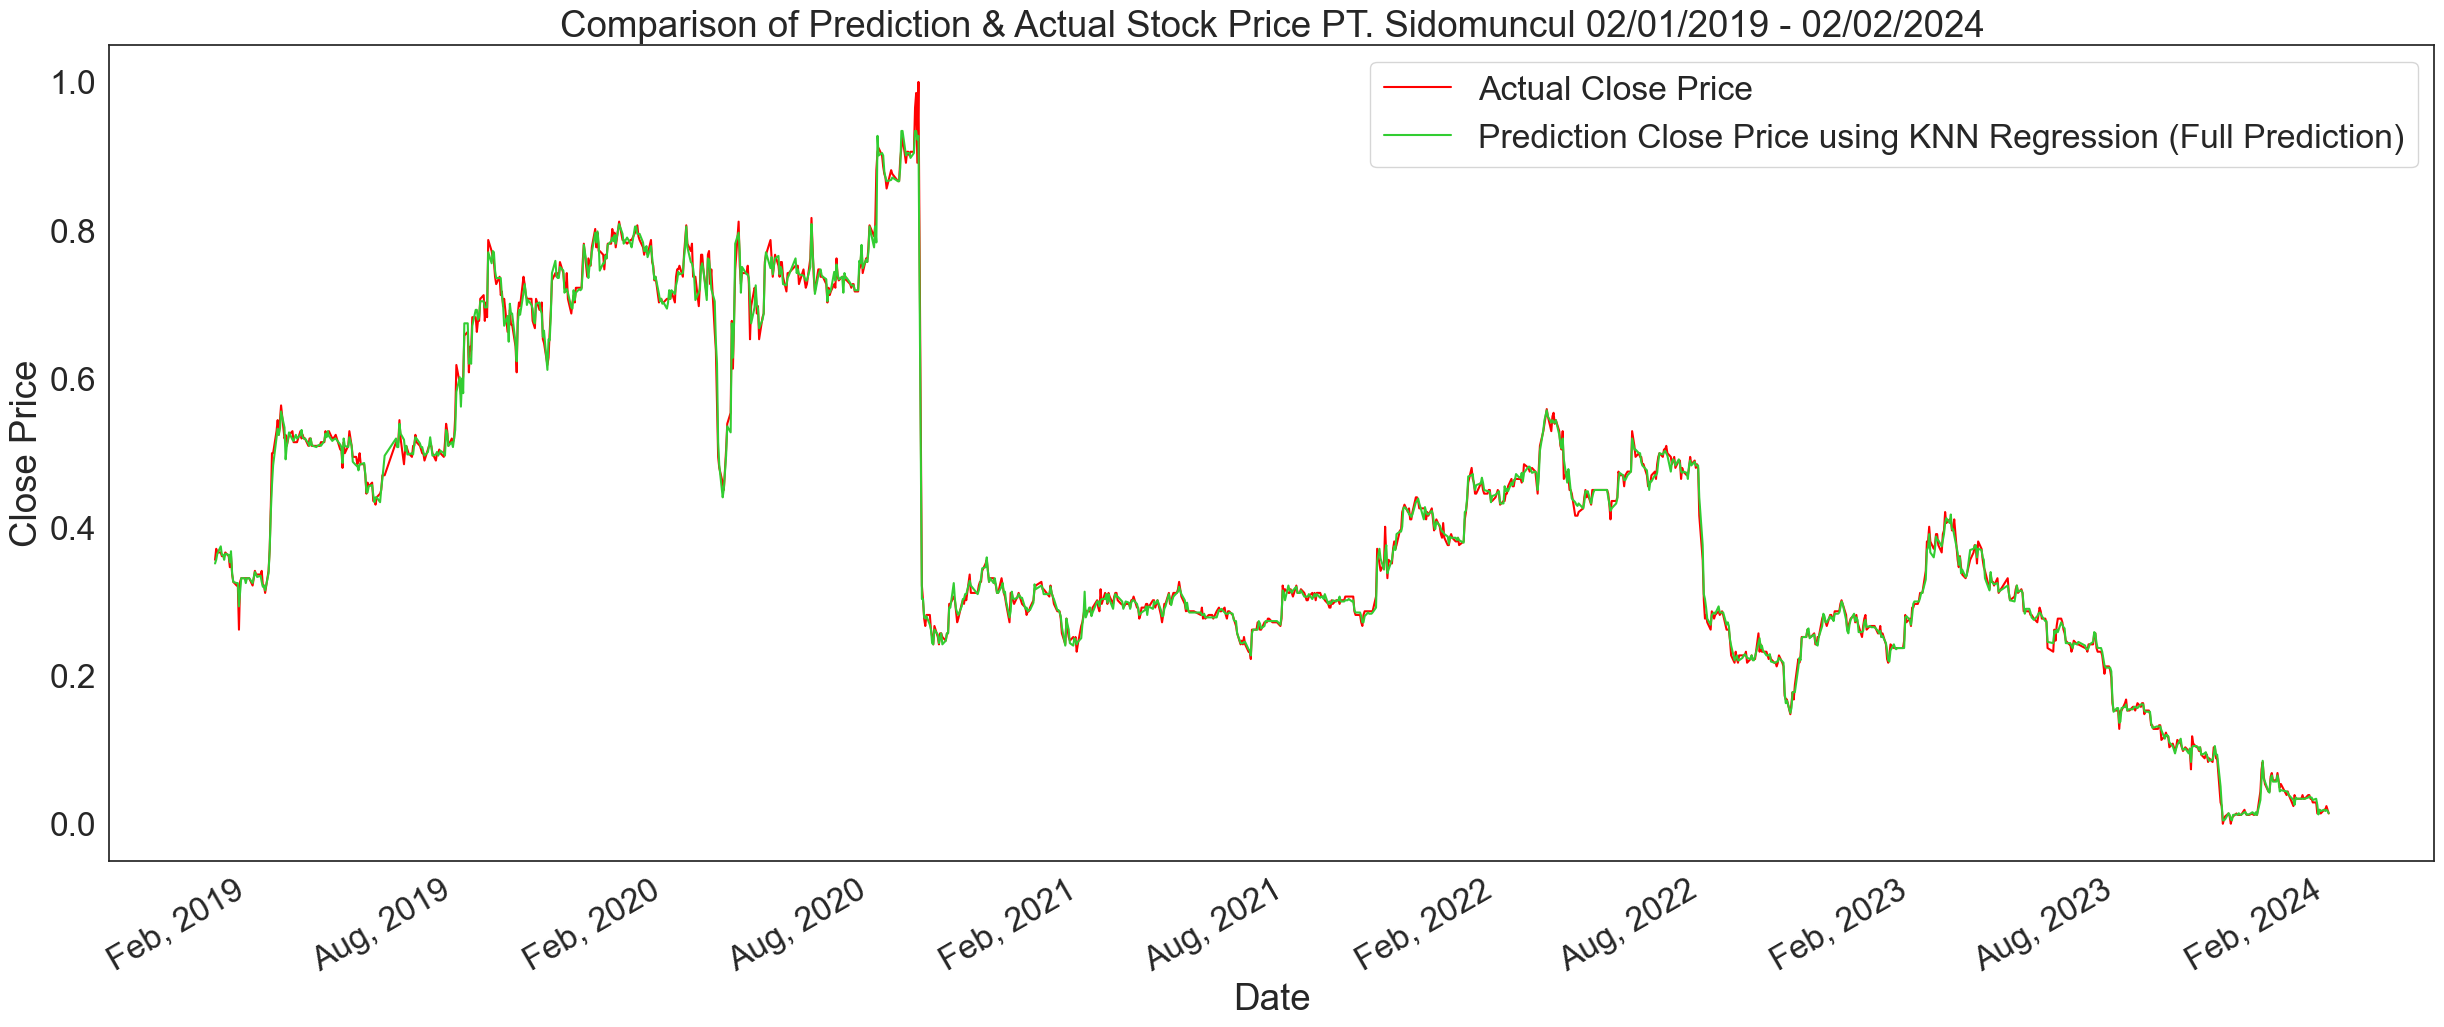

In [330]:
half_year_locator = mdates.MonthLocator(interval=6)
year_month_formatter = mdates.DateFormatter("%Y-%m")
month_year_formatter = mdates.DateFormatter('%b, %Y')

fig,ax = plt.subplots(figsize=(30,12))
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)
ax.xaxis.set_major_formatter(month_year_formatter)

fig.autofmt_xdate()

# plt.figure(figsize=(15,7))
sns.set_theme(style='white',font_scale=2.2)


plt.plot(combined['Date'],combined['Actual'],color='red',label='Actual Close Price')
plt.plot(combined['Date'],combined['Prediction KNN'],color='limegreen',label='Prediction Close Price using KNN Regression (Full Prediction)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.title('Comparison of Prediction & Actual Stock Price PT. Sidomuncul 02/01/2019 - 02/02/2024')
plt.show()

#### Tes model dengan nilai tertentu

In [331]:
uji_prediksi_knn = knn_model.predict([[840,850,835]])
print('Harga prediksi penutupan saham dengan KNN Regresi: ',uji_prediksi[0])

Harga prediksi penutupan saham dengan KNN Regresi:  820.0085460748119


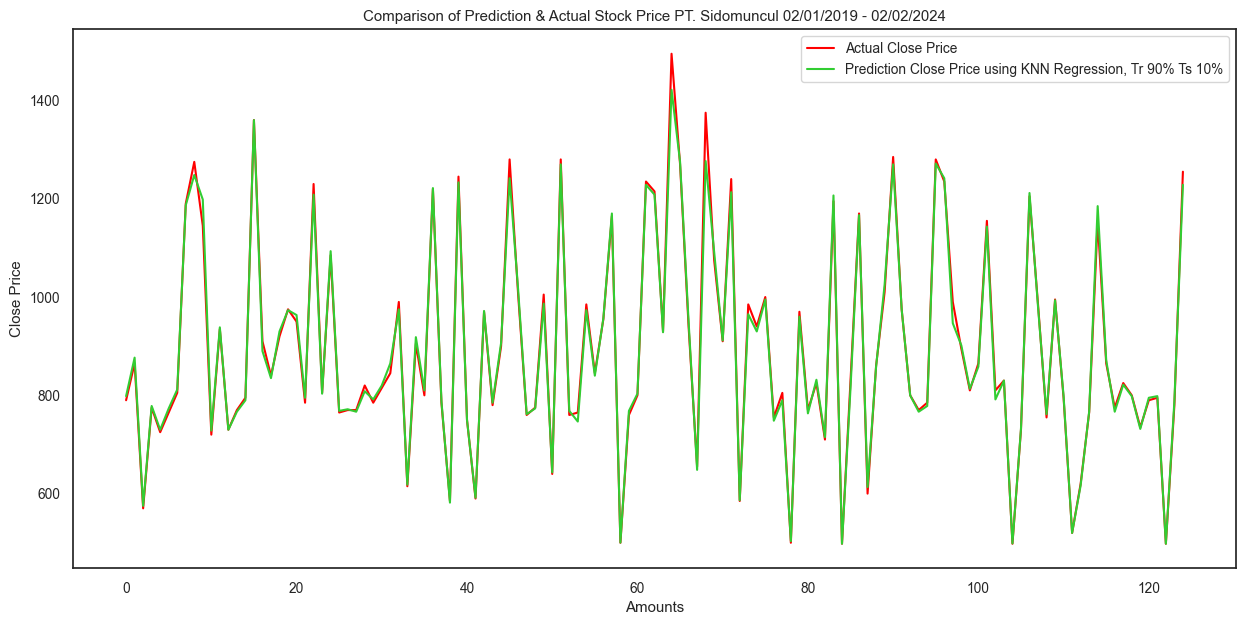

In [332]:
plt.figure(figsize=(15,7))
sns.set_theme(style='white',font_scale=0.9)

plt.plot(inversed_scaled_Y_test,color='red',label='Actual Close Price')
plt.plot(inv_knn_pred['Predict KNN'],color='limegreen',label='Prediction Close Price using KNN Regression, Tr 90% Ts 10%')
plt.xlabel('Amounts')
plt.ylabel('Close Price')
plt.legend()
plt.title('Comparison of Prediction & Actual Stock Price PT. Sidomuncul 02/01/2019 - 02/02/2024')

plt.show()

#### Visualisasi 2 model prediksi dengan nilai riil

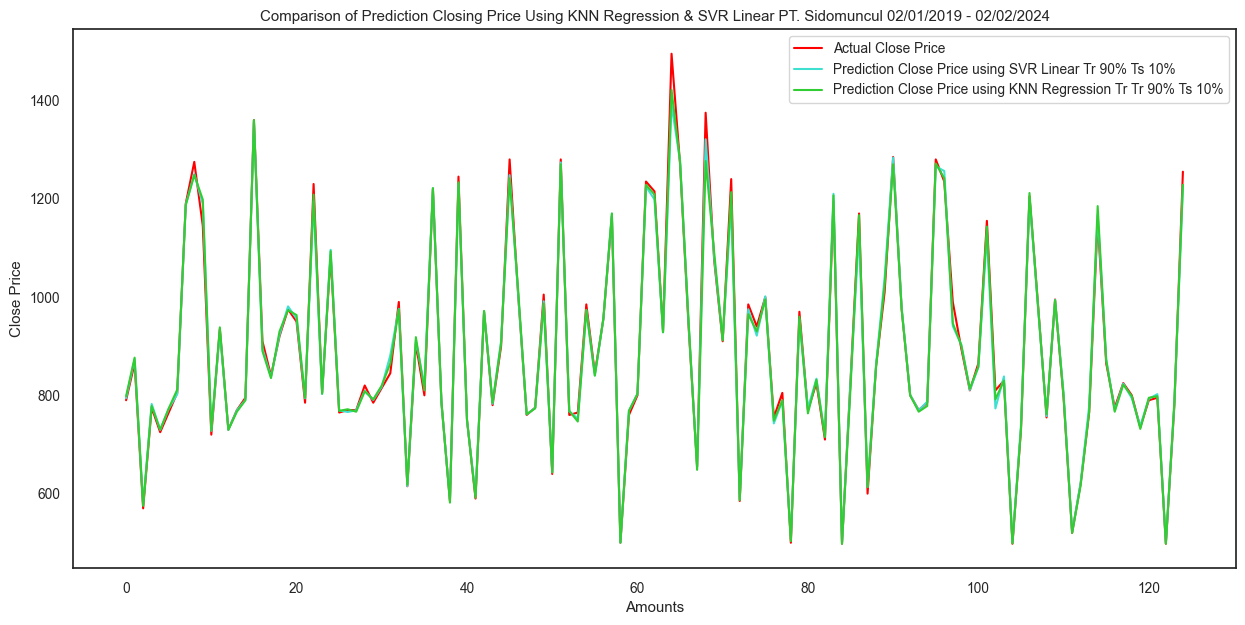

In [333]:
plt.figure(figsize=(15,7))
sns.set_theme(style='white',font_scale=0.9)
plt.plot(inversed_scaled_Y_test,color='red',label='Actual Close Price')
# plt.plot(inversed_prediksi_harga,color='crimson',label='Prediction Close Price using ANN 1 HL Tr 70% Ts 30%')
plt.plot(inversed_prediksi_svr,color='turquoise',label='Prediction Close Price using SVR Linear Tr 90% Ts 10%')
plt.plot(inv_knn_pred,color='limegreen',label='Prediction Close Price using KNN Regression Tr Tr 90% Ts 10%')
plt.xlabel('Amounts')
plt.ylabel('Close Price')
plt.legend()
plt.title('Comparison of Prediction Closing Price Using KNN Regression & SVR Linear PT. Sidomuncul 02/01/2019 - 02/02/2024')

plt.show()

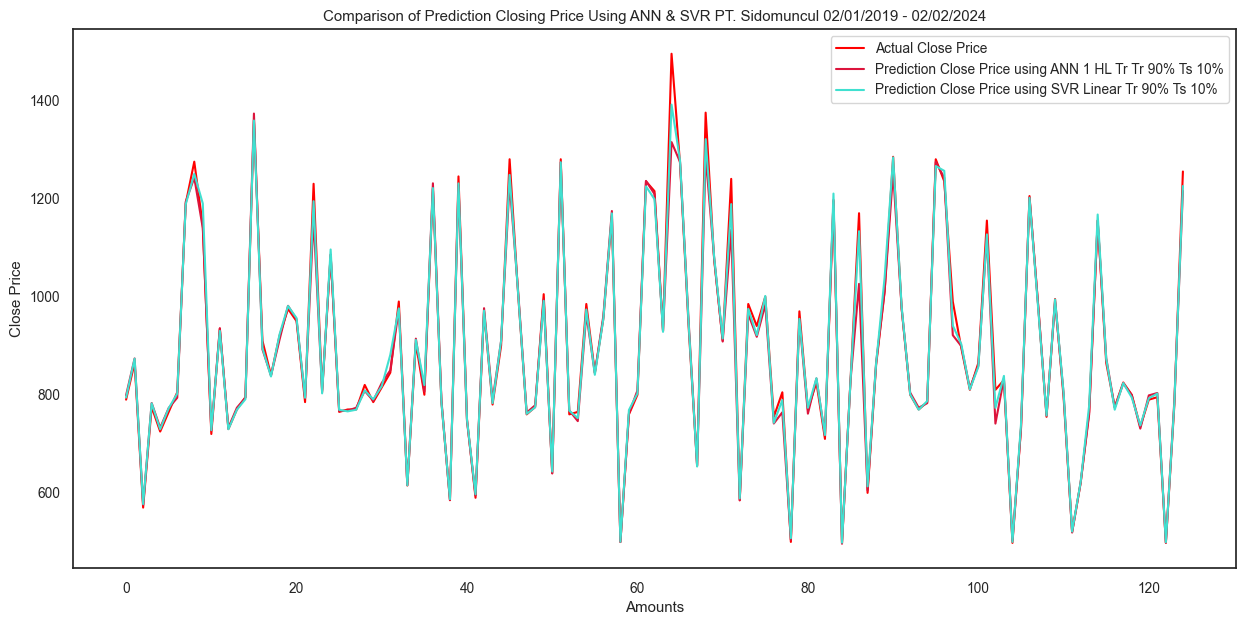

In [334]:
plt.figure(figsize=(15,7))
sns.set_theme(style='white',font_scale=0.9)
plt.plot(inversed_scaled_Y_test,color='red',label='Actual Close Price')
plt.plot(inversed_prediksi_harga,color='crimson',label='Prediction Close Price using ANN 1 HL Tr Tr 90% Ts 10%')
plt.plot(inversed_prediksi_svr,color='turquoise',label='Prediction Close Price using SVR Linear Tr 90% Ts 10%')
# plt.plot(inv_knn_pred,color='limegreen',label='Prediction Close Price using KNN Regression Tr 80% Ts 20%')
plt.xlabel('Amounts')
plt.ylabel('Close Price')
plt.legend()
plt.title('Comparison of Prediction Closing Price Using ANN & SVR PT. Sidomuncul 02/01/2019 - 02/02/2024')

plt.show()

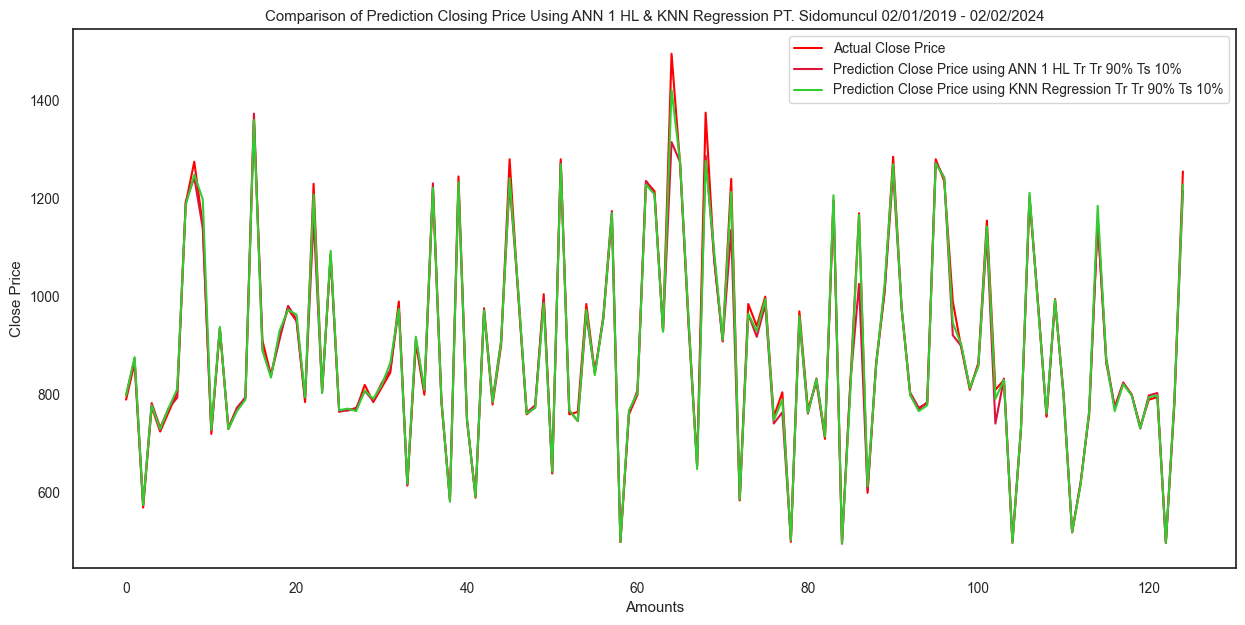

In [335]:
plt.figure(figsize=(15,7))
sns.set_theme(style='white',font_scale=0.9)
plt.plot(inversed_scaled_Y_test,color='red',label='Actual Close Price')
plt.plot(inversed_prediksi_harga,color='crimson',label='Prediction Close Price using ANN 1 HL Tr Tr 90% Ts 10%')
# plt.plot(inversed_prediksi_svr,color='turquoise',label='Prediction Close Price using SVR Linear Tr 80% Ts 20%')
plt.plot(inv_knn_pred['Predict KNN'],color='limegreen',label='Prediction Close Price using KNN Regression Tr Tr 90% Ts 10%')
plt.xlabel('Amounts')
plt.ylabel('Close Price')
plt.legend()
plt.title('Comparison of Prediction Closing Price Using ANN 1 HL & KNN Regression PT. Sidomuncul 02/01/2019 - 02/02/2024')

plt.show()

#### ANN vs SVR vs KNN

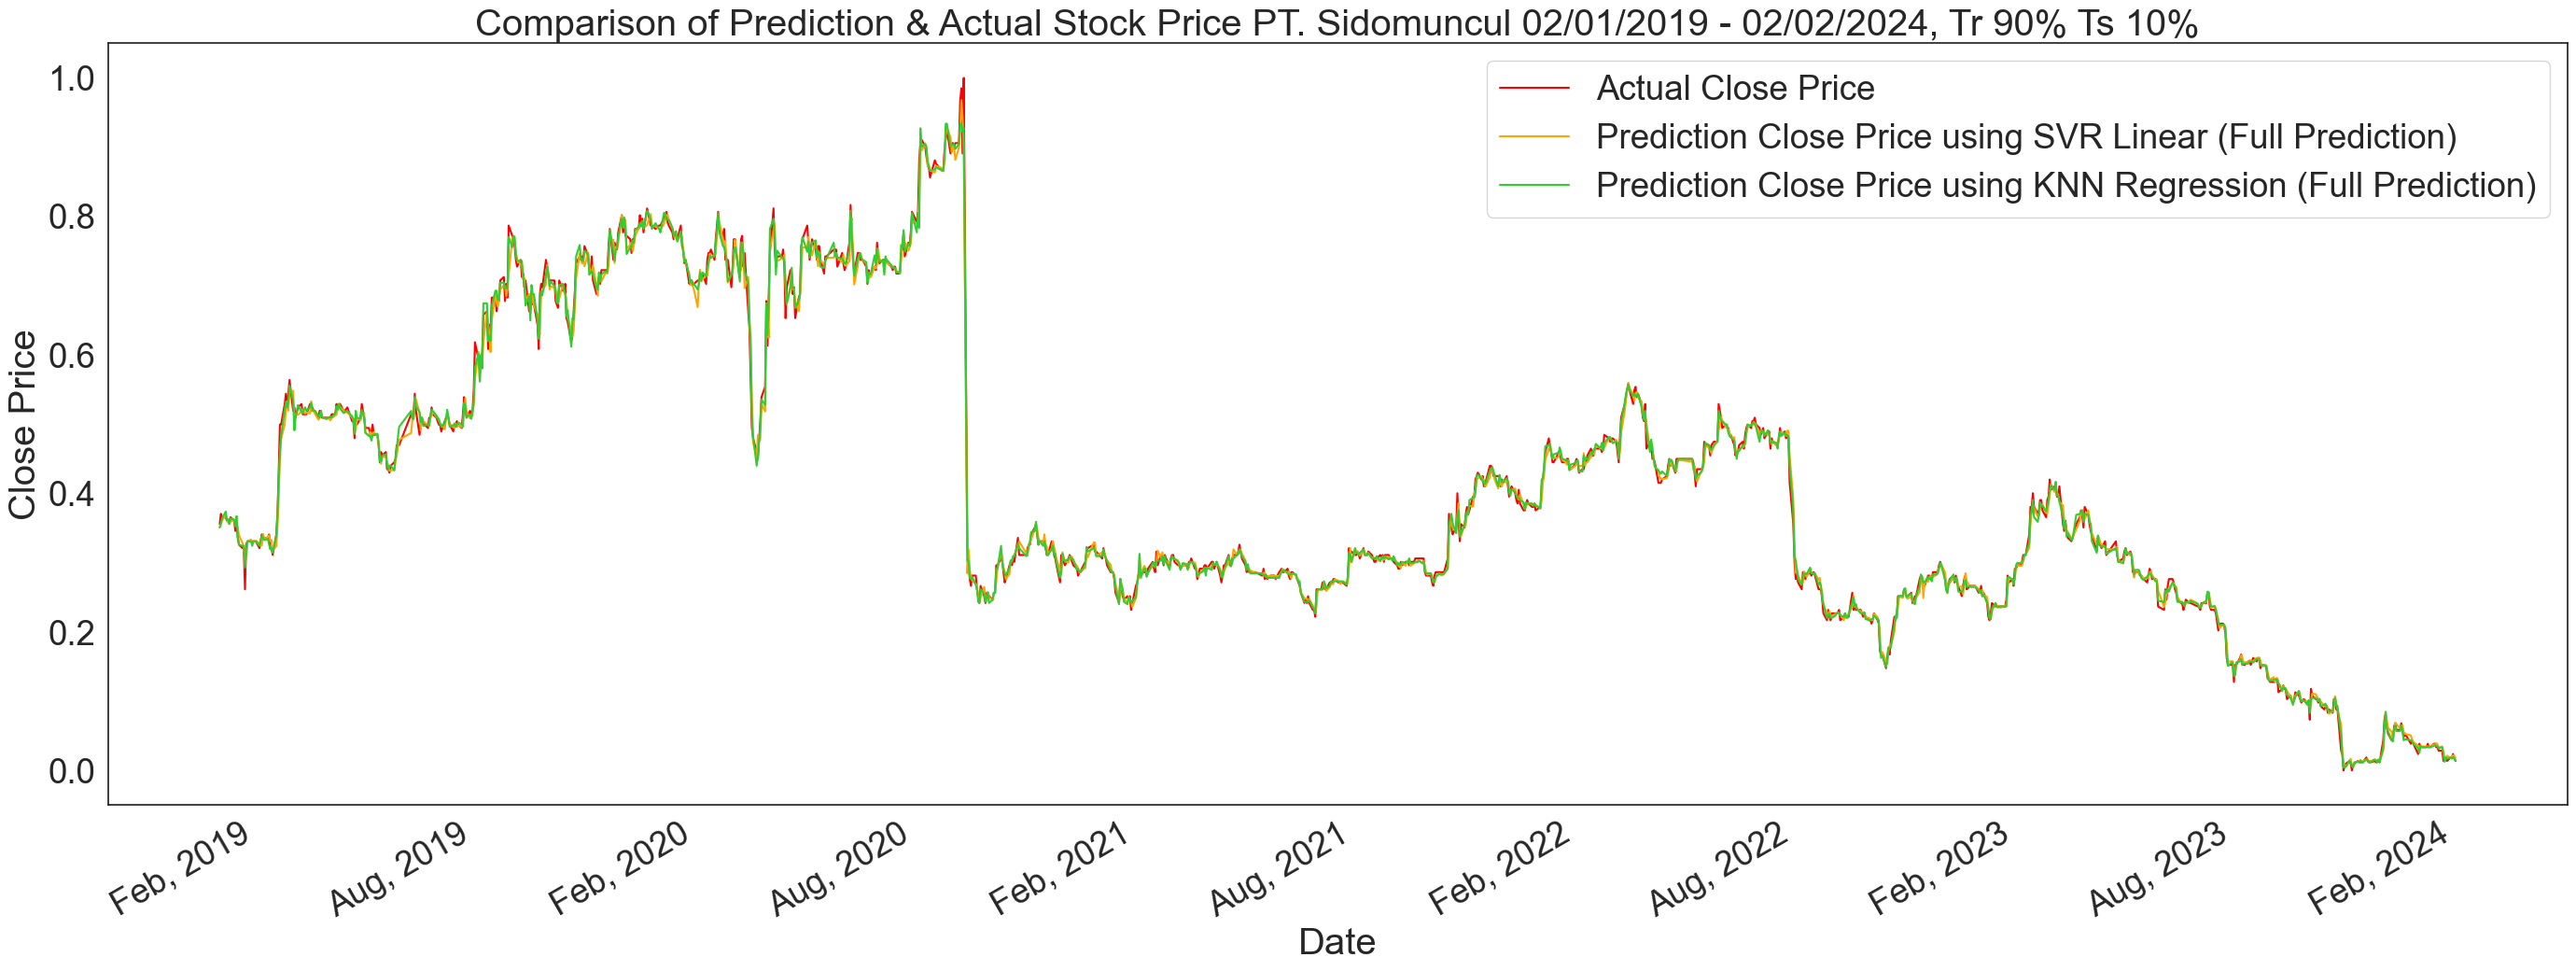

In [339]:
half_year_locator = mdates.MonthLocator(interval=6)
year_month_formatter = mdates.DateFormatter("%Y-%m")
month_year_formatter = mdates.DateFormatter('%b, %Y')

fig,ax = plt.subplots(figsize=(34,12))
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)
ax.xaxis.set_major_formatter(month_year_formatter)

fig.autofmt_xdate()

# plt.figure(figsize=(15,7))
sns.set_theme(style='white',font_scale=2.4)


plt.plot(combined['Date'],combined['Actual'],color='red',label='Actual Close Price')
# plt.plot(combined['Date'],combined['Prediction ANN'],color='teal',label='Prediction Close Price using ANN 1 HL (Full Prediction)')
plt.plot(combined['Date'],combined['Prediction SVR'],color='orange',label='Prediction Close Price using SVR Linear (Full Prediction)')
plt.plot(combined['Date'],combined['Prediction KNN'],color='limegreen',label='Prediction Close Price using KNN Regression (Full Prediction)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.title('Comparison of Prediction & Actual Stock Price PT. Sidomuncul 02/01/2019 - 02/02/2024, Tr 90% Ts 10%')
plt.show()